In [9]:
%matplotlib inline

# Dependencies

import pandas as pd
import json
from pathlib import Path
from py_scripts.functions import Master_NC_Dataframe
from py_scripts.functions import Category_df
from py_scripts.functions import column_list
from py_scripts.functions import data_categories
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
print(Master_NC_Dataframe.head())
Category_df


             County  year  Active Dentists  Active Primary Care Physicians  \
0   Alamance County  2020             70.0                            96.0   
1  Alexander County  2020              5.0                             8.0   
2  Alleghany County  2020              2.0                             7.0   
3      Anson County  2020              3.0                             7.0   
4       Ashe County  2020              8.0                            15.0   

   Beds in General Hospitals  Deaths by Injury or Violence  Divorces  \
0                      182.0                         185.0     539.0   
1                       25.0                          38.0      52.0   
2                       41.0                          15.0      40.0   
3                       15.0                          31.0      66.0   
4                       76.0                          23.0      78.0   

   General Hospital Discharges  Infant Deaths  \
0                      12498.0           11.0   


per_1000                         not_per_1000
0   Healthcare Personnel and Facilities  Healthcare Personnel and Facilities
1                      Female_Other_Age           Birth and Death Statistics
2                      Female_White_Age      Life Events and Family Planning
3                        Male_White_Age                     Income and Wages
4                        Male_Other_Age          Employment and Unemployment
5            Birth and Death Statistics                  Poverty and Welfare
6       Life Events and Family Planning                            Education
7                      Income and Wages           Geographic and Census Data
8           Employment and Unemployment          Welfare and Social Security
9                   Poverty and Welfare                                  NaN
10                            Education                                  NaN
11          Welfare and Social Security                                  NaN

In [10]:
#example replacement for relevant columns
print("The below can be used to reference columns with in the nested dictionary data_categories")
print(data_categories['per_1000']['Education'])

The below can be used to reference columns with in the nested dictionary data_categories
['People (<High School)', "Bachelor's Degree or Higher Am. Indian Alaska Native Age 25 Up", 'Black Age 25 Up w/Elementary School Education or Less', 'College Enrollment', 'College Graduates Age 25 Up', 'Community College Enrollment', 'Elementary School Education or Less Age 25 Up', 'Enrollment in Home Schools', 'High School Enrollment', 'High School Graduates (incl. Equivalency) Am. Indian Alaska Native Age 25 Up', 'High School Graduates Age 25 Up', 'High School Graduates Black Age 25 Up', 'High School Graduates White Age 25 Up', 'Kindergarten and Elementary School Enrollment', 'Less Than 5 Years of Elementary School Age 25 Up', 'Less Than High School Diploma Am. Indian Alaska Native Age 25 Up', 'Nonpublic School Enrollment', 'Nursery School Enrollment', 'Preprimary or Kindergarten School Enrollment', 'Private College Enrollment', 'Public College Enrollment', 'Public High School Dropouts', 'Public 

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\466376917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000
C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\466376917.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

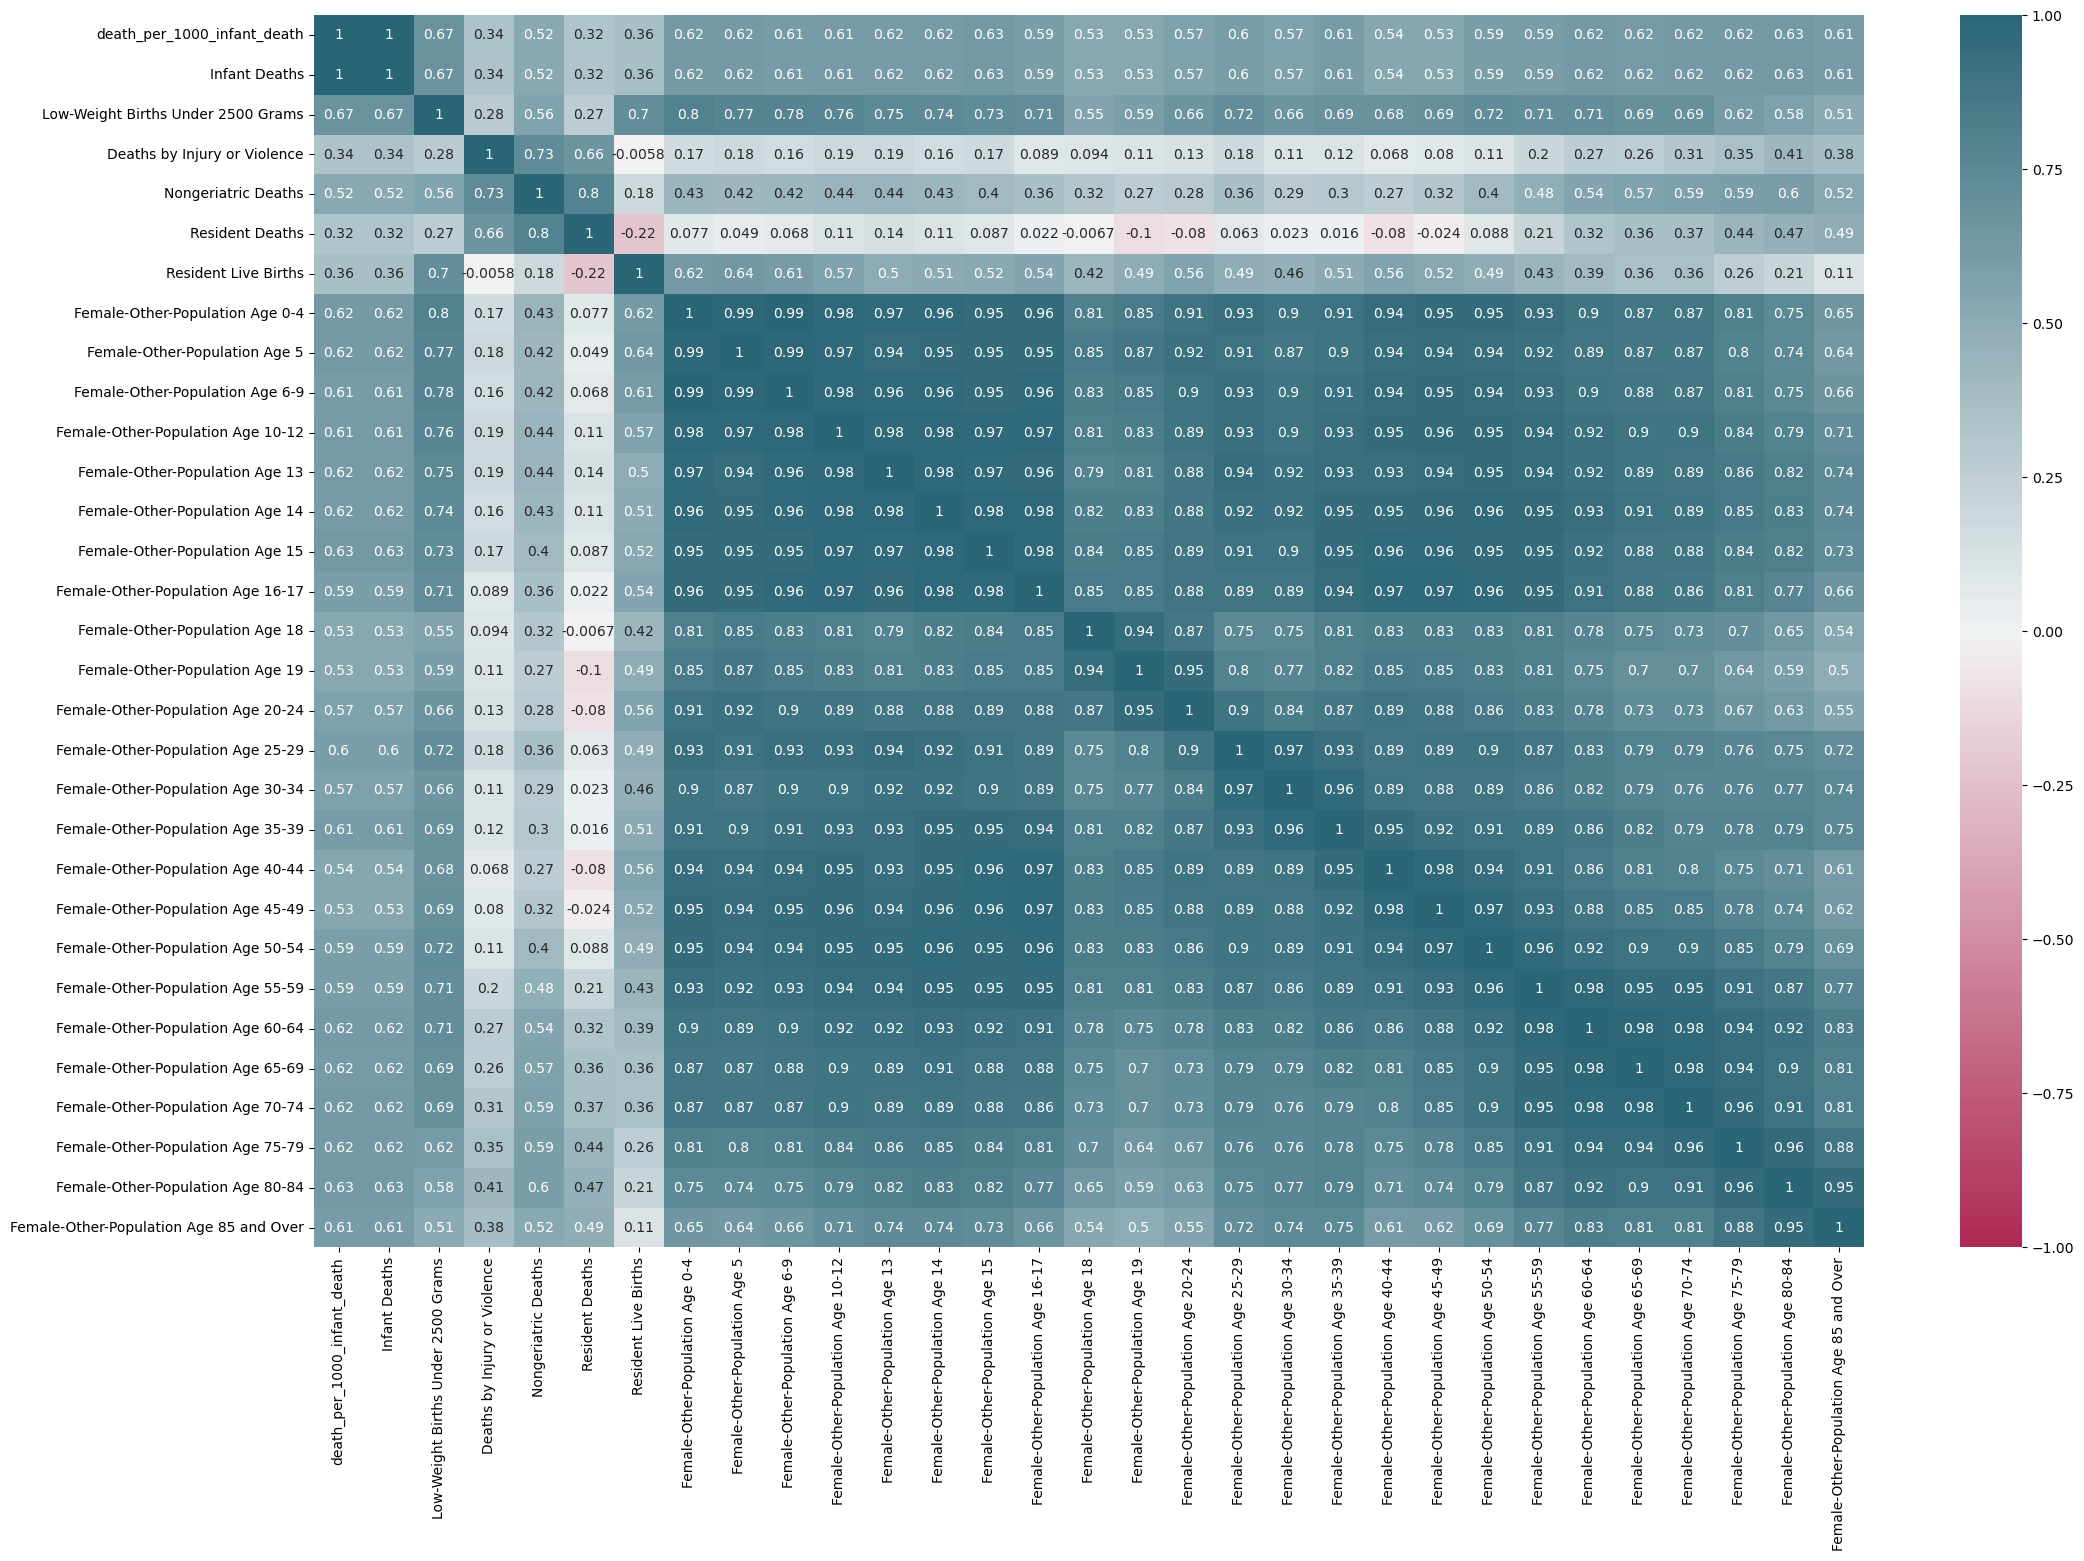

In [11]:
# Generate heat map comparing female-other-age and education.

per_thousand_df = Master_NC_Dataframe[data_categories['not_per_1000']['Geographic and Census Data'] + ['death_per_1000_infant_death'] + data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Education'] + data_categories['per_1000']['Employment and Unemployment'] + data_categories['per_1000']['Female_Other_Age'] + data_categories['per_1000']['Female_White_Age'] + data_categories['per_1000']['Healthcare Personnel and Facilities'] + data_categories['per_1000']['Income and Wages'] + data_categories['per_1000']['Life Events and Family Planning'] + data_categories['per_1000']['Male_Other_Age'] + data_categories['per_1000']['Male_White_Age'] + data_categories['per_1000']['Poverty and Welfare'] + data_categories['per_1000']['Welfare and Social Security']]

# Convert relevant columns to per-1000 counts.
per_thousand_columns = data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Female_Other_Age']
for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000


per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]

# Generate heat map.
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

# Generate heat map.
plt.figure(figsize=(25,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))

# Observations

We see that higher populations of young, female, non-white correlate with higher rates of infant deaths and low birth weights.

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\1228835701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000
C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\1228835701.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

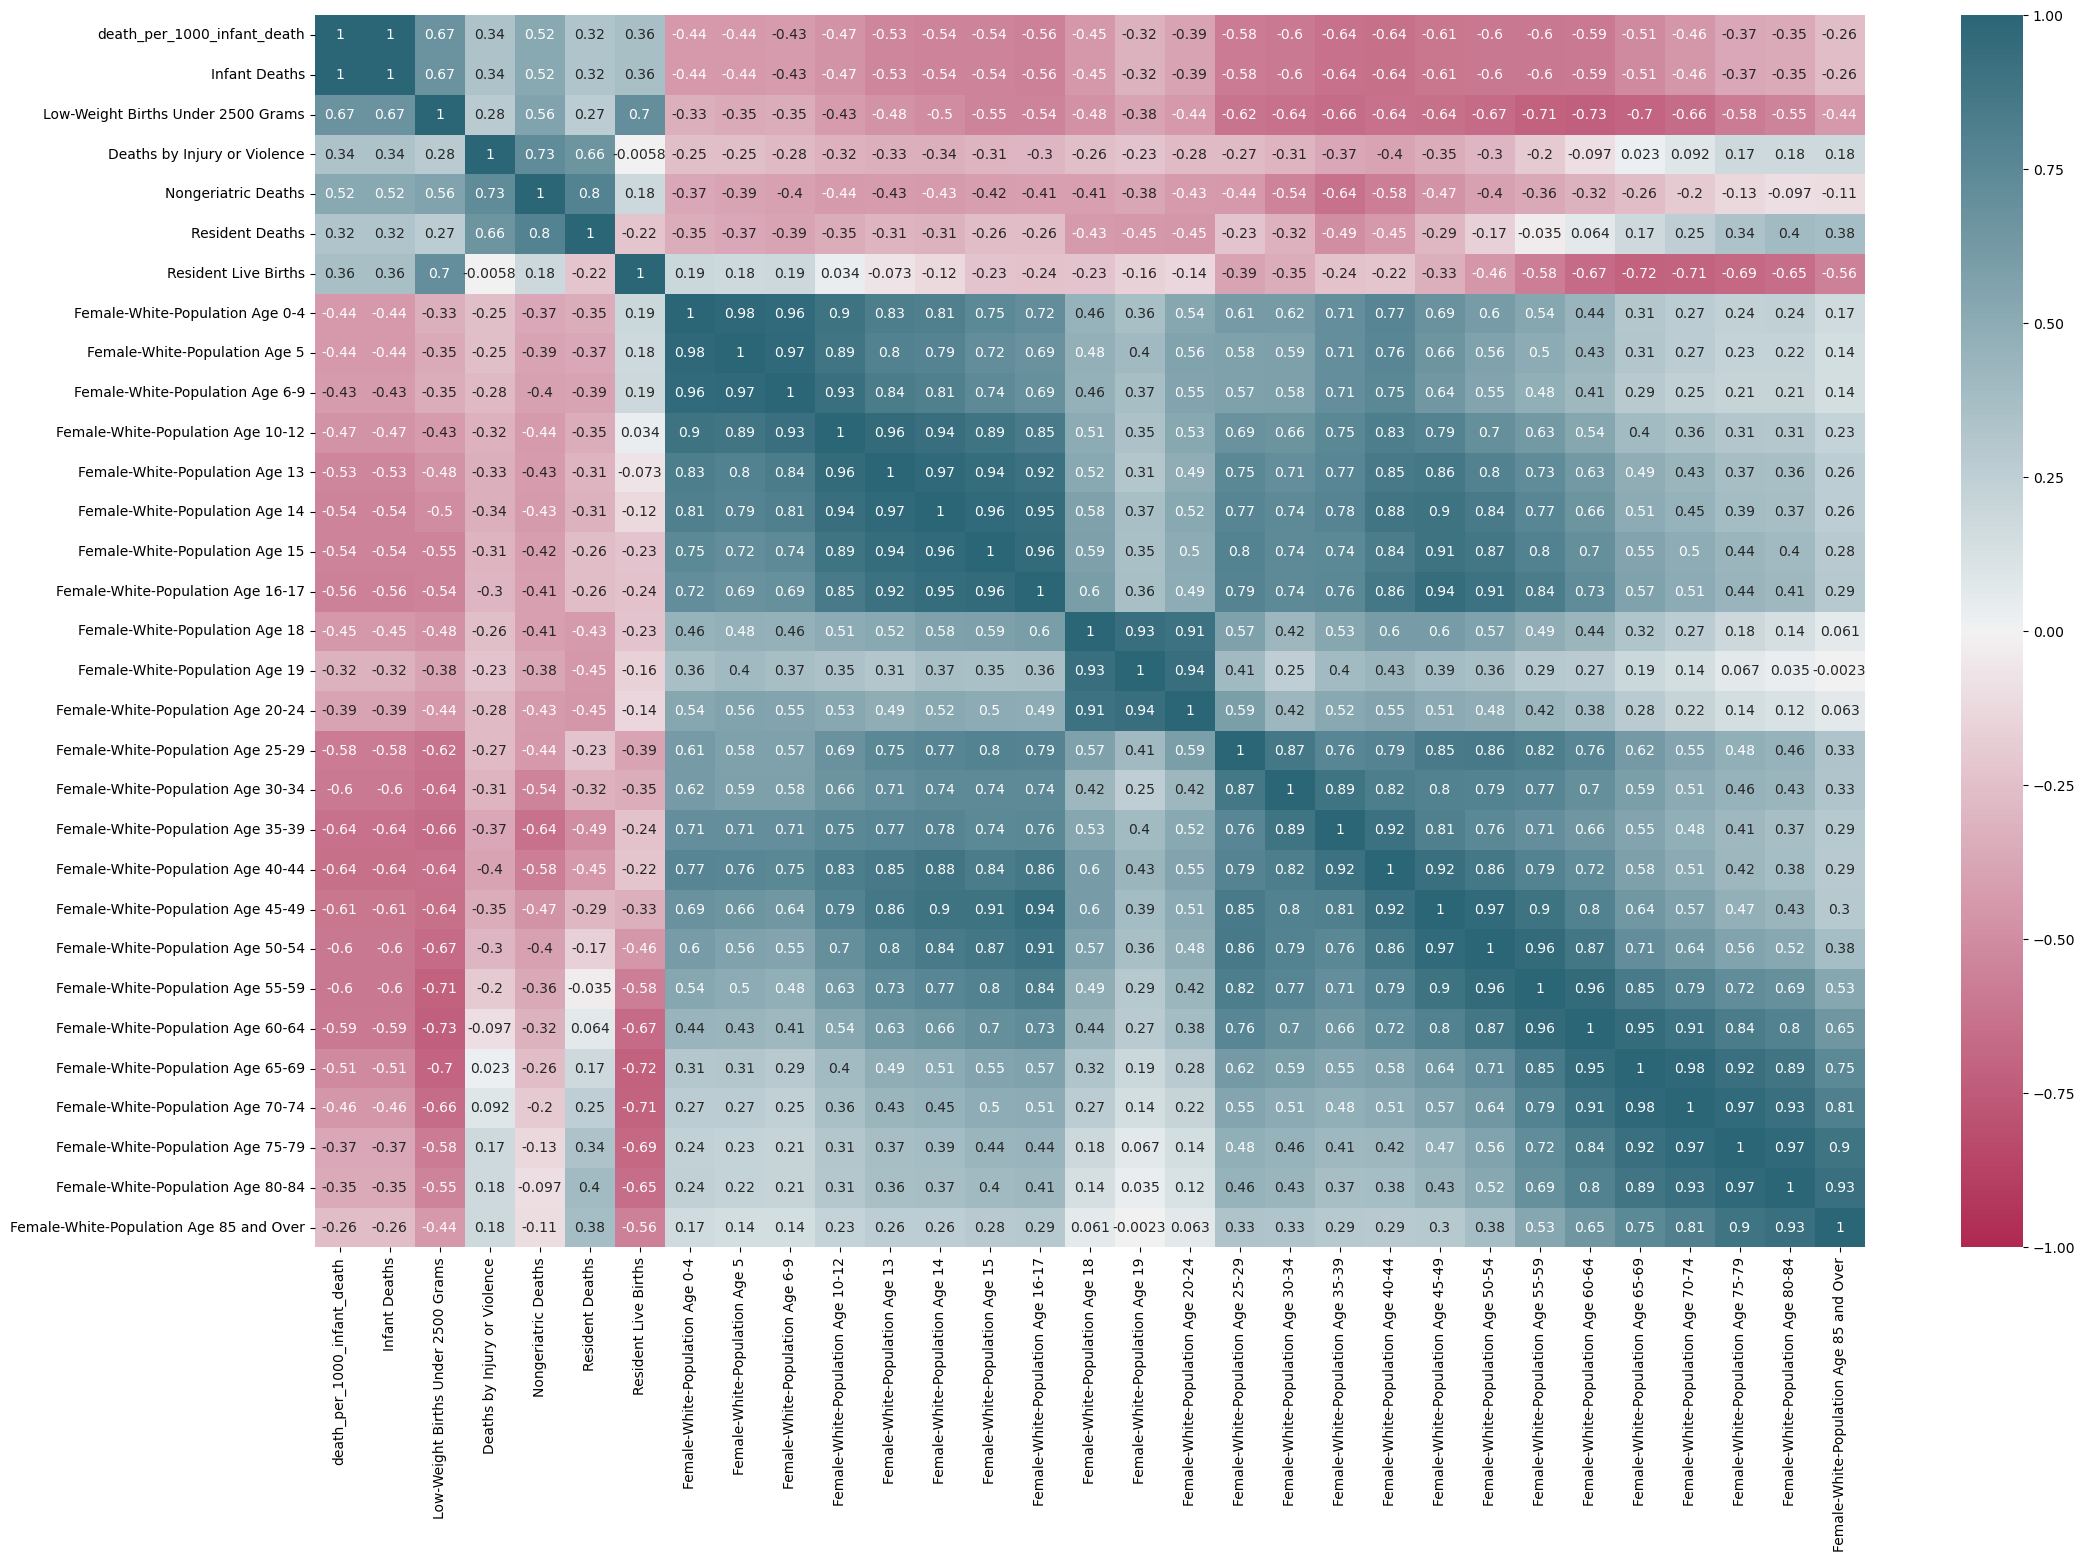

In [12]:
# Generate heat map comparing female-white-age and education.

per_thousand_df = Master_NC_Dataframe[data_categories['not_per_1000']['Geographic and Census Data'] + ['death_per_1000_infant_death'] + data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Education'] + data_categories['per_1000']['Employment and Unemployment'] + data_categories['per_1000']['Female_Other_Age'] + data_categories['per_1000']['Female_White_Age'] + data_categories['per_1000']['Healthcare Personnel and Facilities'] + data_categories['per_1000']['Income and Wages'] + data_categories['per_1000']['Life Events and Family Planning'] + data_categories['per_1000']['Male_Other_Age'] + data_categories['per_1000']['Male_White_Age'] + data_categories['per_1000']['Poverty and Welfare'] + data_categories['per_1000']['Welfare and Social Security']]

# Convert relevant columns to per-1000 counts.
per_thousand_columns = data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Female_White_Age']
for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000

per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]

# Remove zero values from the dataframe.
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

# Generate heat map.
plt.figure(figsize=(25,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))

# Observations

Higher populations of white females are negatively correlated with infant deaths and low birth weights.  This is contrasted with the correlations shown for non-white females.

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\782489782.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000
C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\782489782.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

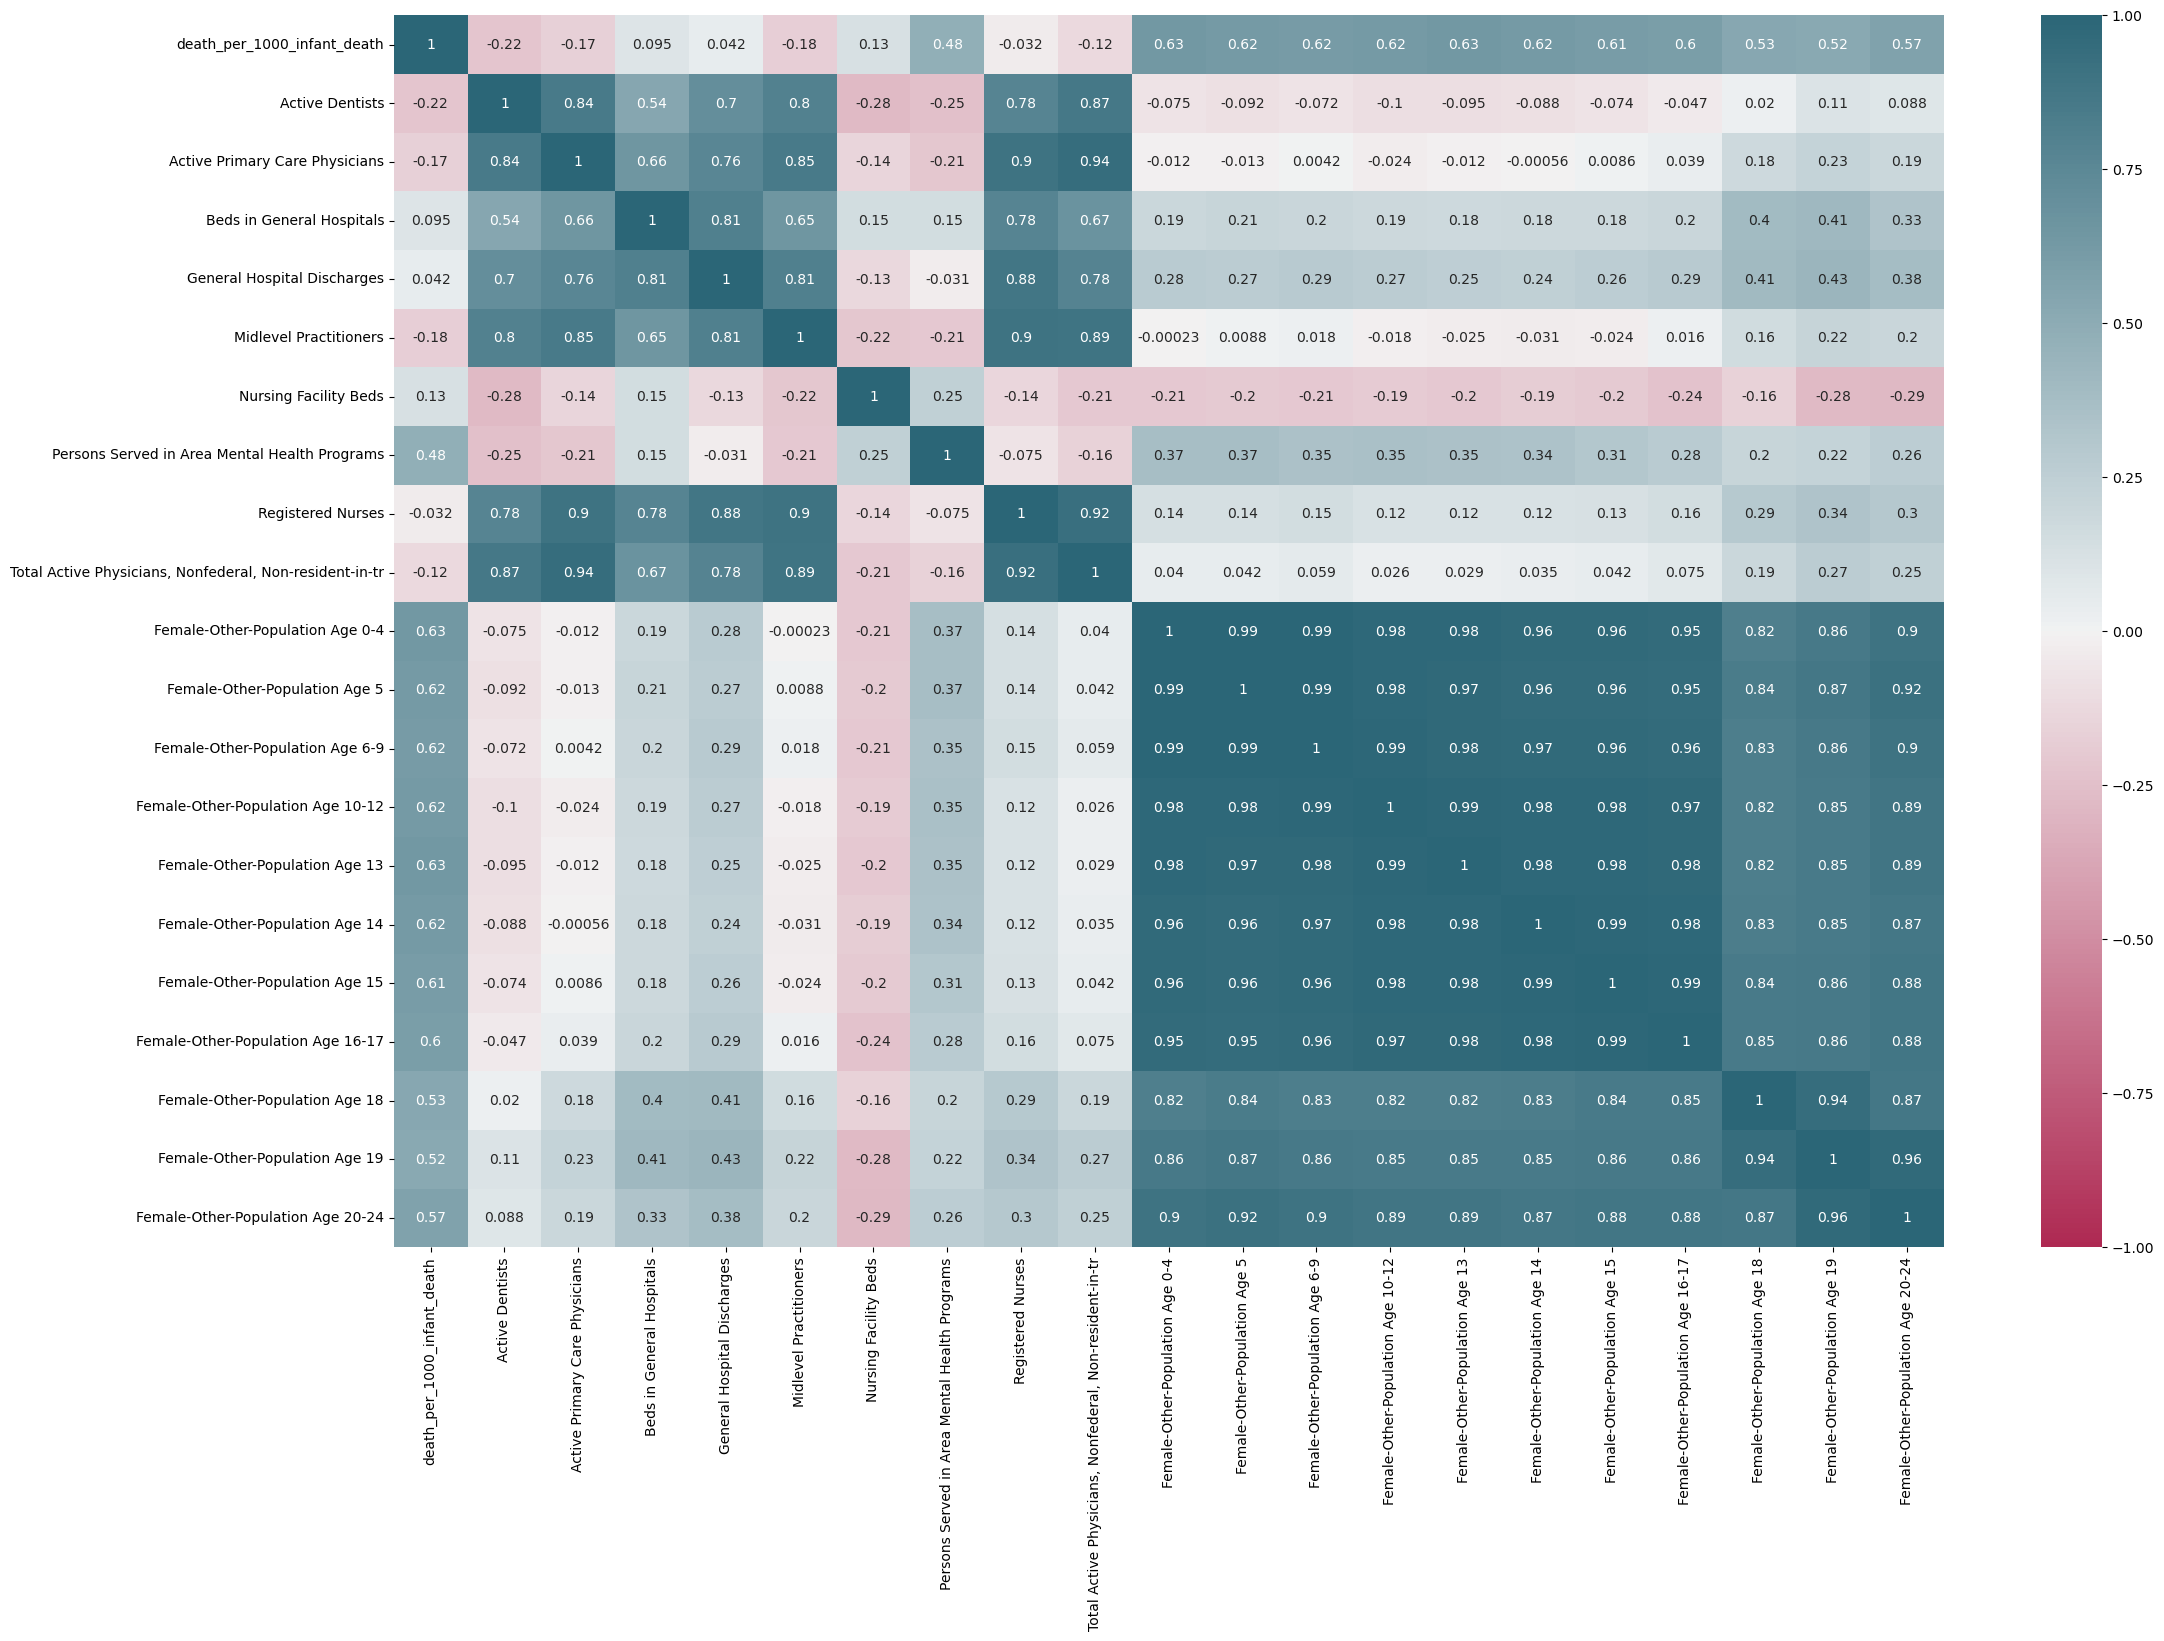

In [13]:
# Smaller heatmap using female-other (ages 0 through 30) compared against 'Healthcare Personnel and Facilities'.

per_thousand_df = Master_NC_Dataframe[data_categories['not_per_1000']['Geographic and Census Data'] + ['death_per_1000_infant_death'] + data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Education'] + data_categories['per_1000']['Employment and Unemployment'] + data_categories['per_1000']['Female_Other_Age'] + data_categories['per_1000']['Female_White_Age'] + data_categories['per_1000']['Healthcare Personnel and Facilities'] + data_categories['per_1000']['Income and Wages'] + data_categories['per_1000']['Life Events and Family Planning'] + data_categories['per_1000']['Male_Other_Age'] + data_categories['per_1000']['Male_White_Age'] + data_categories['per_1000']['Poverty and Welfare'] + data_categories['per_1000']['Welfare and Social Security']]

# Convert relevant columns to per-1000 counts.
per_thousand_columns =  data_categories['per_1000']['Healthcare Personnel and Facilities'] + \
                        data_categories['per_1000']['Female_Other_Age'][0:11]
                        
for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000


per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]

# Remove rows contain values equal to 0.
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

# Generate heat map.
plt.figure(figsize=(25,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))

# Observations

We see that there is little to no correlation between populations of non-white females and availability of medical professionals.  This seems to indicate that access is not the underlying reason for infant mortality and low birth weight.


C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\37520958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000
C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\37520958.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

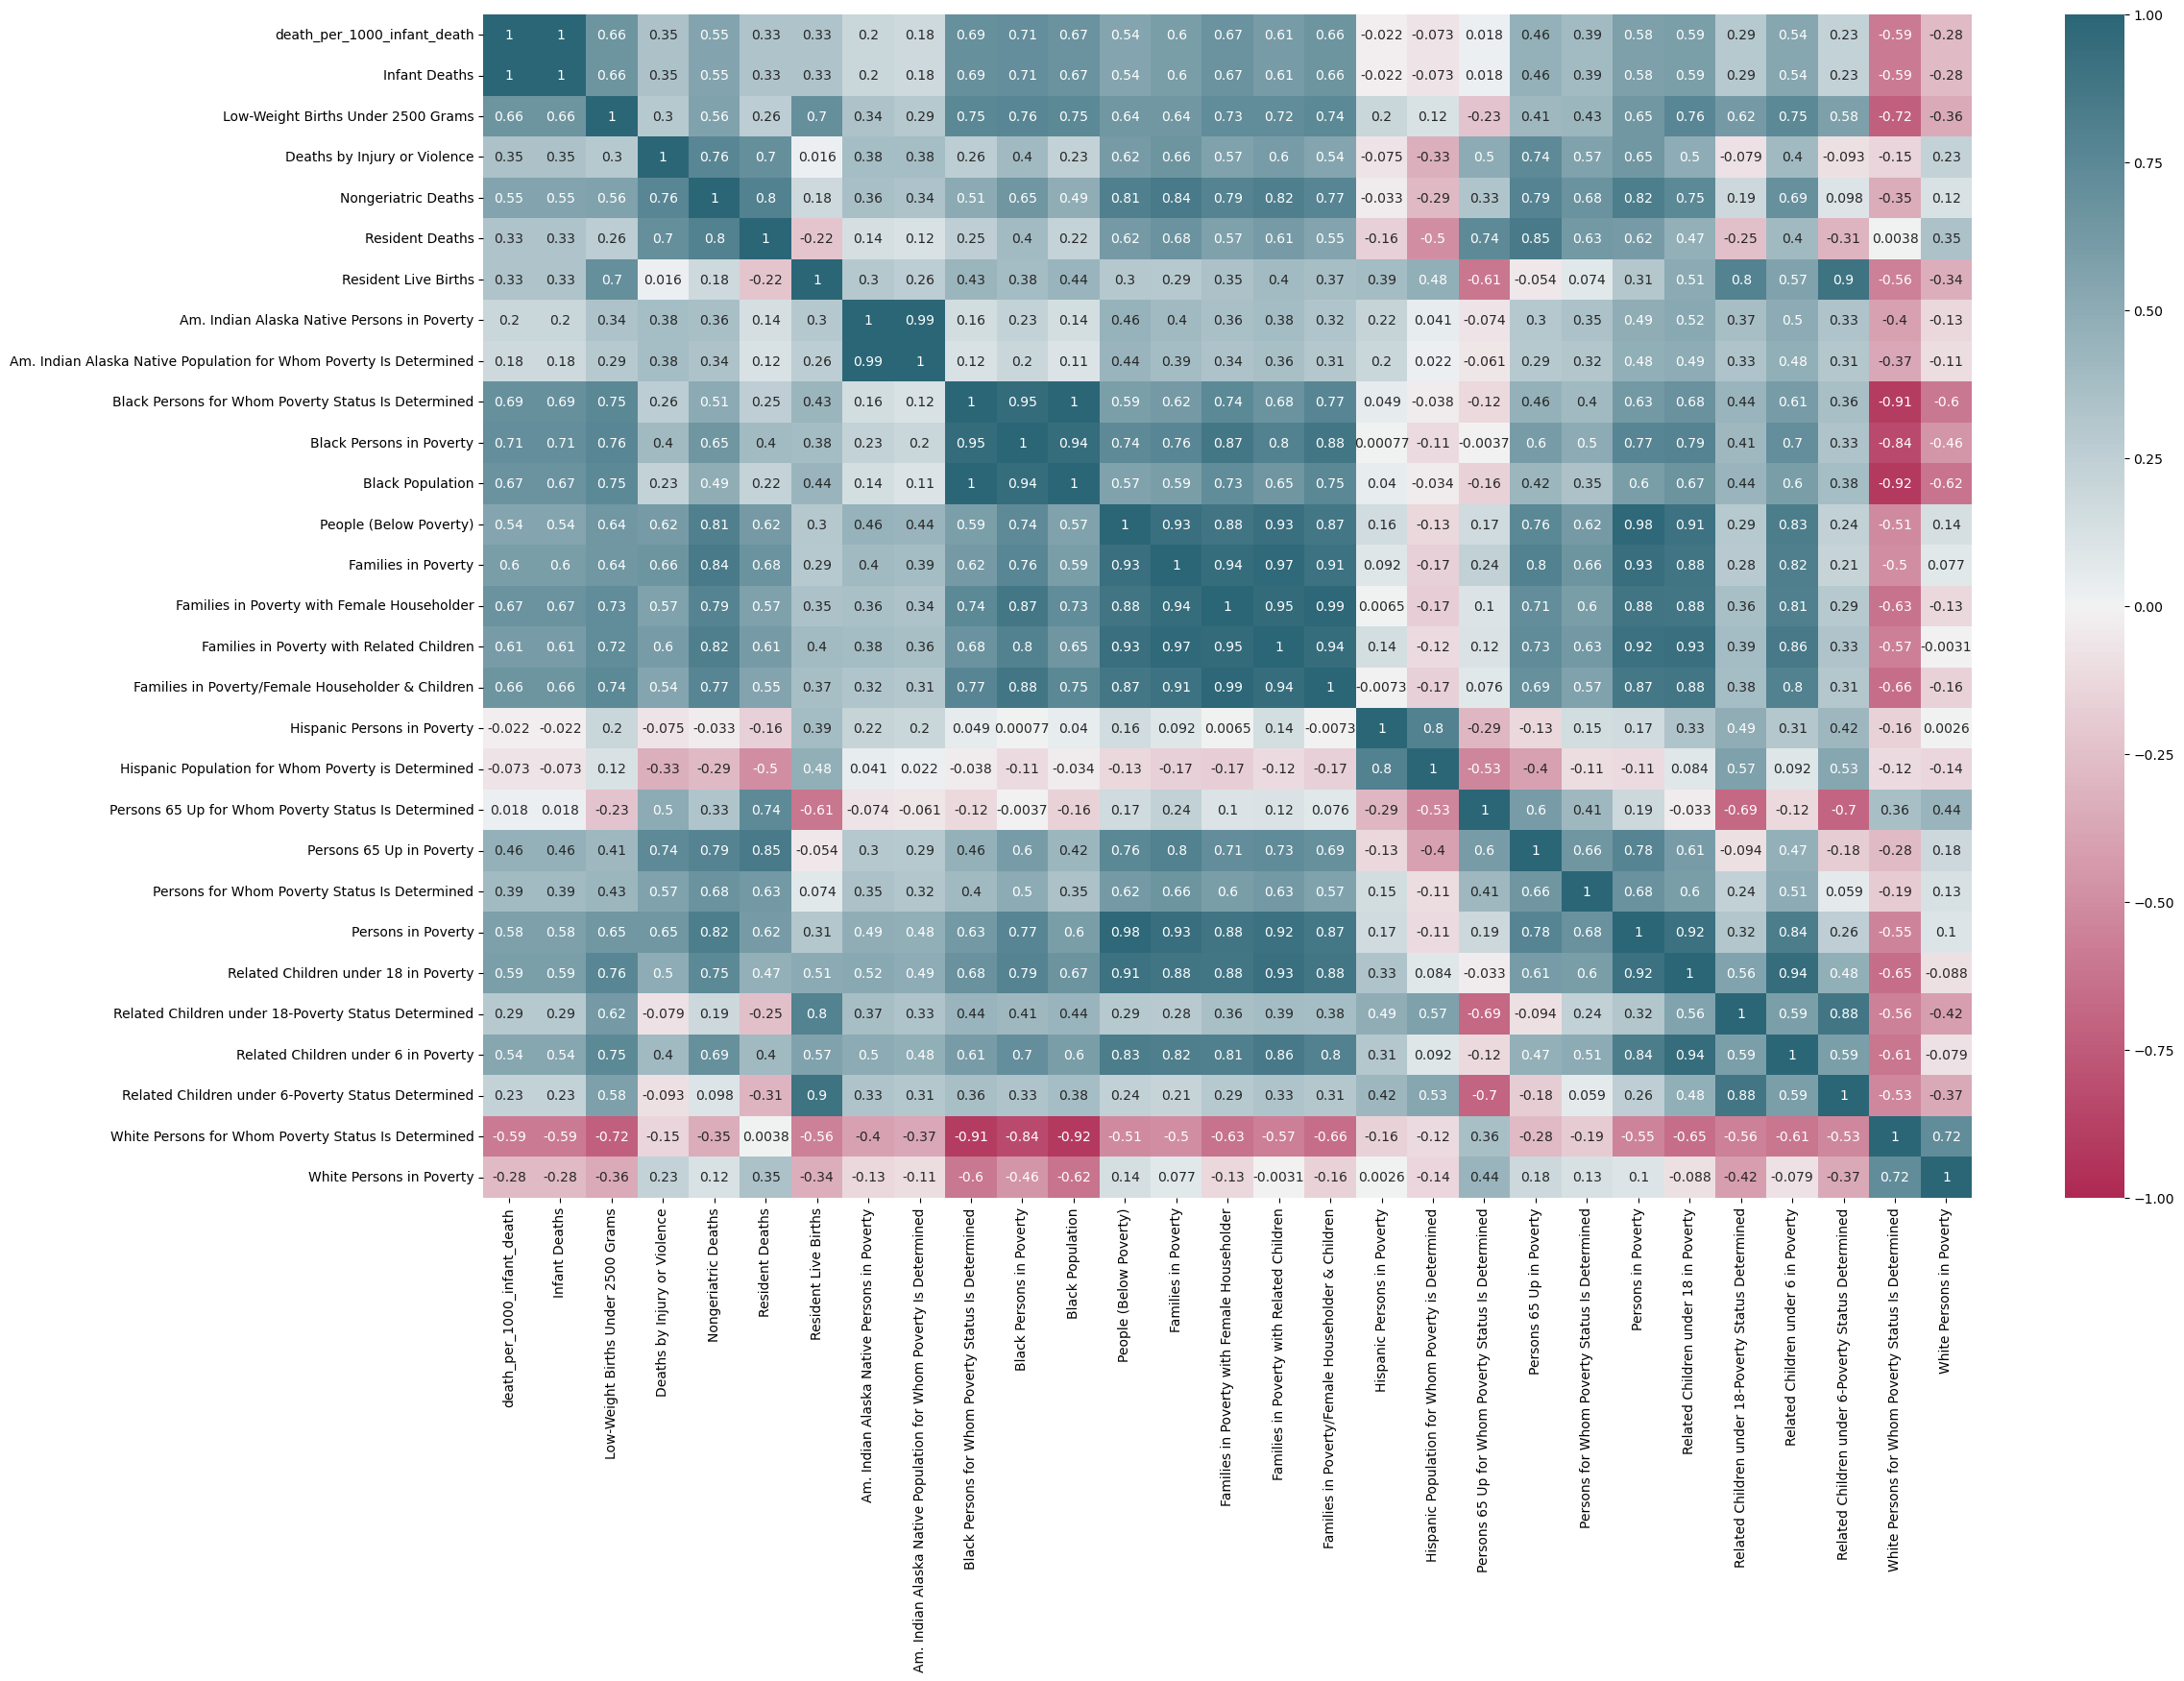

In [14]:
# Heatmap comparing 'Poverty and Welfare' counts against 'Birth and Death Statistics'

per_thousand_df = Master_NC_Dataframe[data_categories['not_per_1000']['Geographic and Census Data'] + ['death_per_1000_infant_death'] + data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Education'] + data_categories['per_1000']['Employment and Unemployment'] + data_categories['per_1000']['Female_Other_Age'] + data_categories['per_1000']['Female_White_Age'] + data_categories['per_1000']['Healthcare Personnel and Facilities'] + data_categories['per_1000']['Income and Wages'] + data_categories['per_1000']['Life Events and Family Planning'] + data_categories['per_1000']['Male_Other_Age'] + data_categories['per_1000']['Male_White_Age'] + data_categories['per_1000']['Poverty and Welfare'] + data_categories['per_1000']['Welfare and Social Security']]

# Convert relevant columns to per-1000 counts.
per_thousand_columns =  data_categories['per_1000']['Birth and Death Statistics'] + \
                        data_categories['per_1000']['Poverty and Welfare']
                        
for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000


per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]

# Remove rows contain values equal to 0.
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

# Generate heat map.
plt.figure(figsize=(25,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))

# Observations

Several correlation values stick out in the above plot:

- Black population vs. low birth weight (r = 0.75).
- People (below poverty) vs. low birth weight (r = 0.64).
- Families in poverty with Female Householder vs. infant death (r = 0.67).

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\702095791.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000
C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\702095791.py:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Correlated_df.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

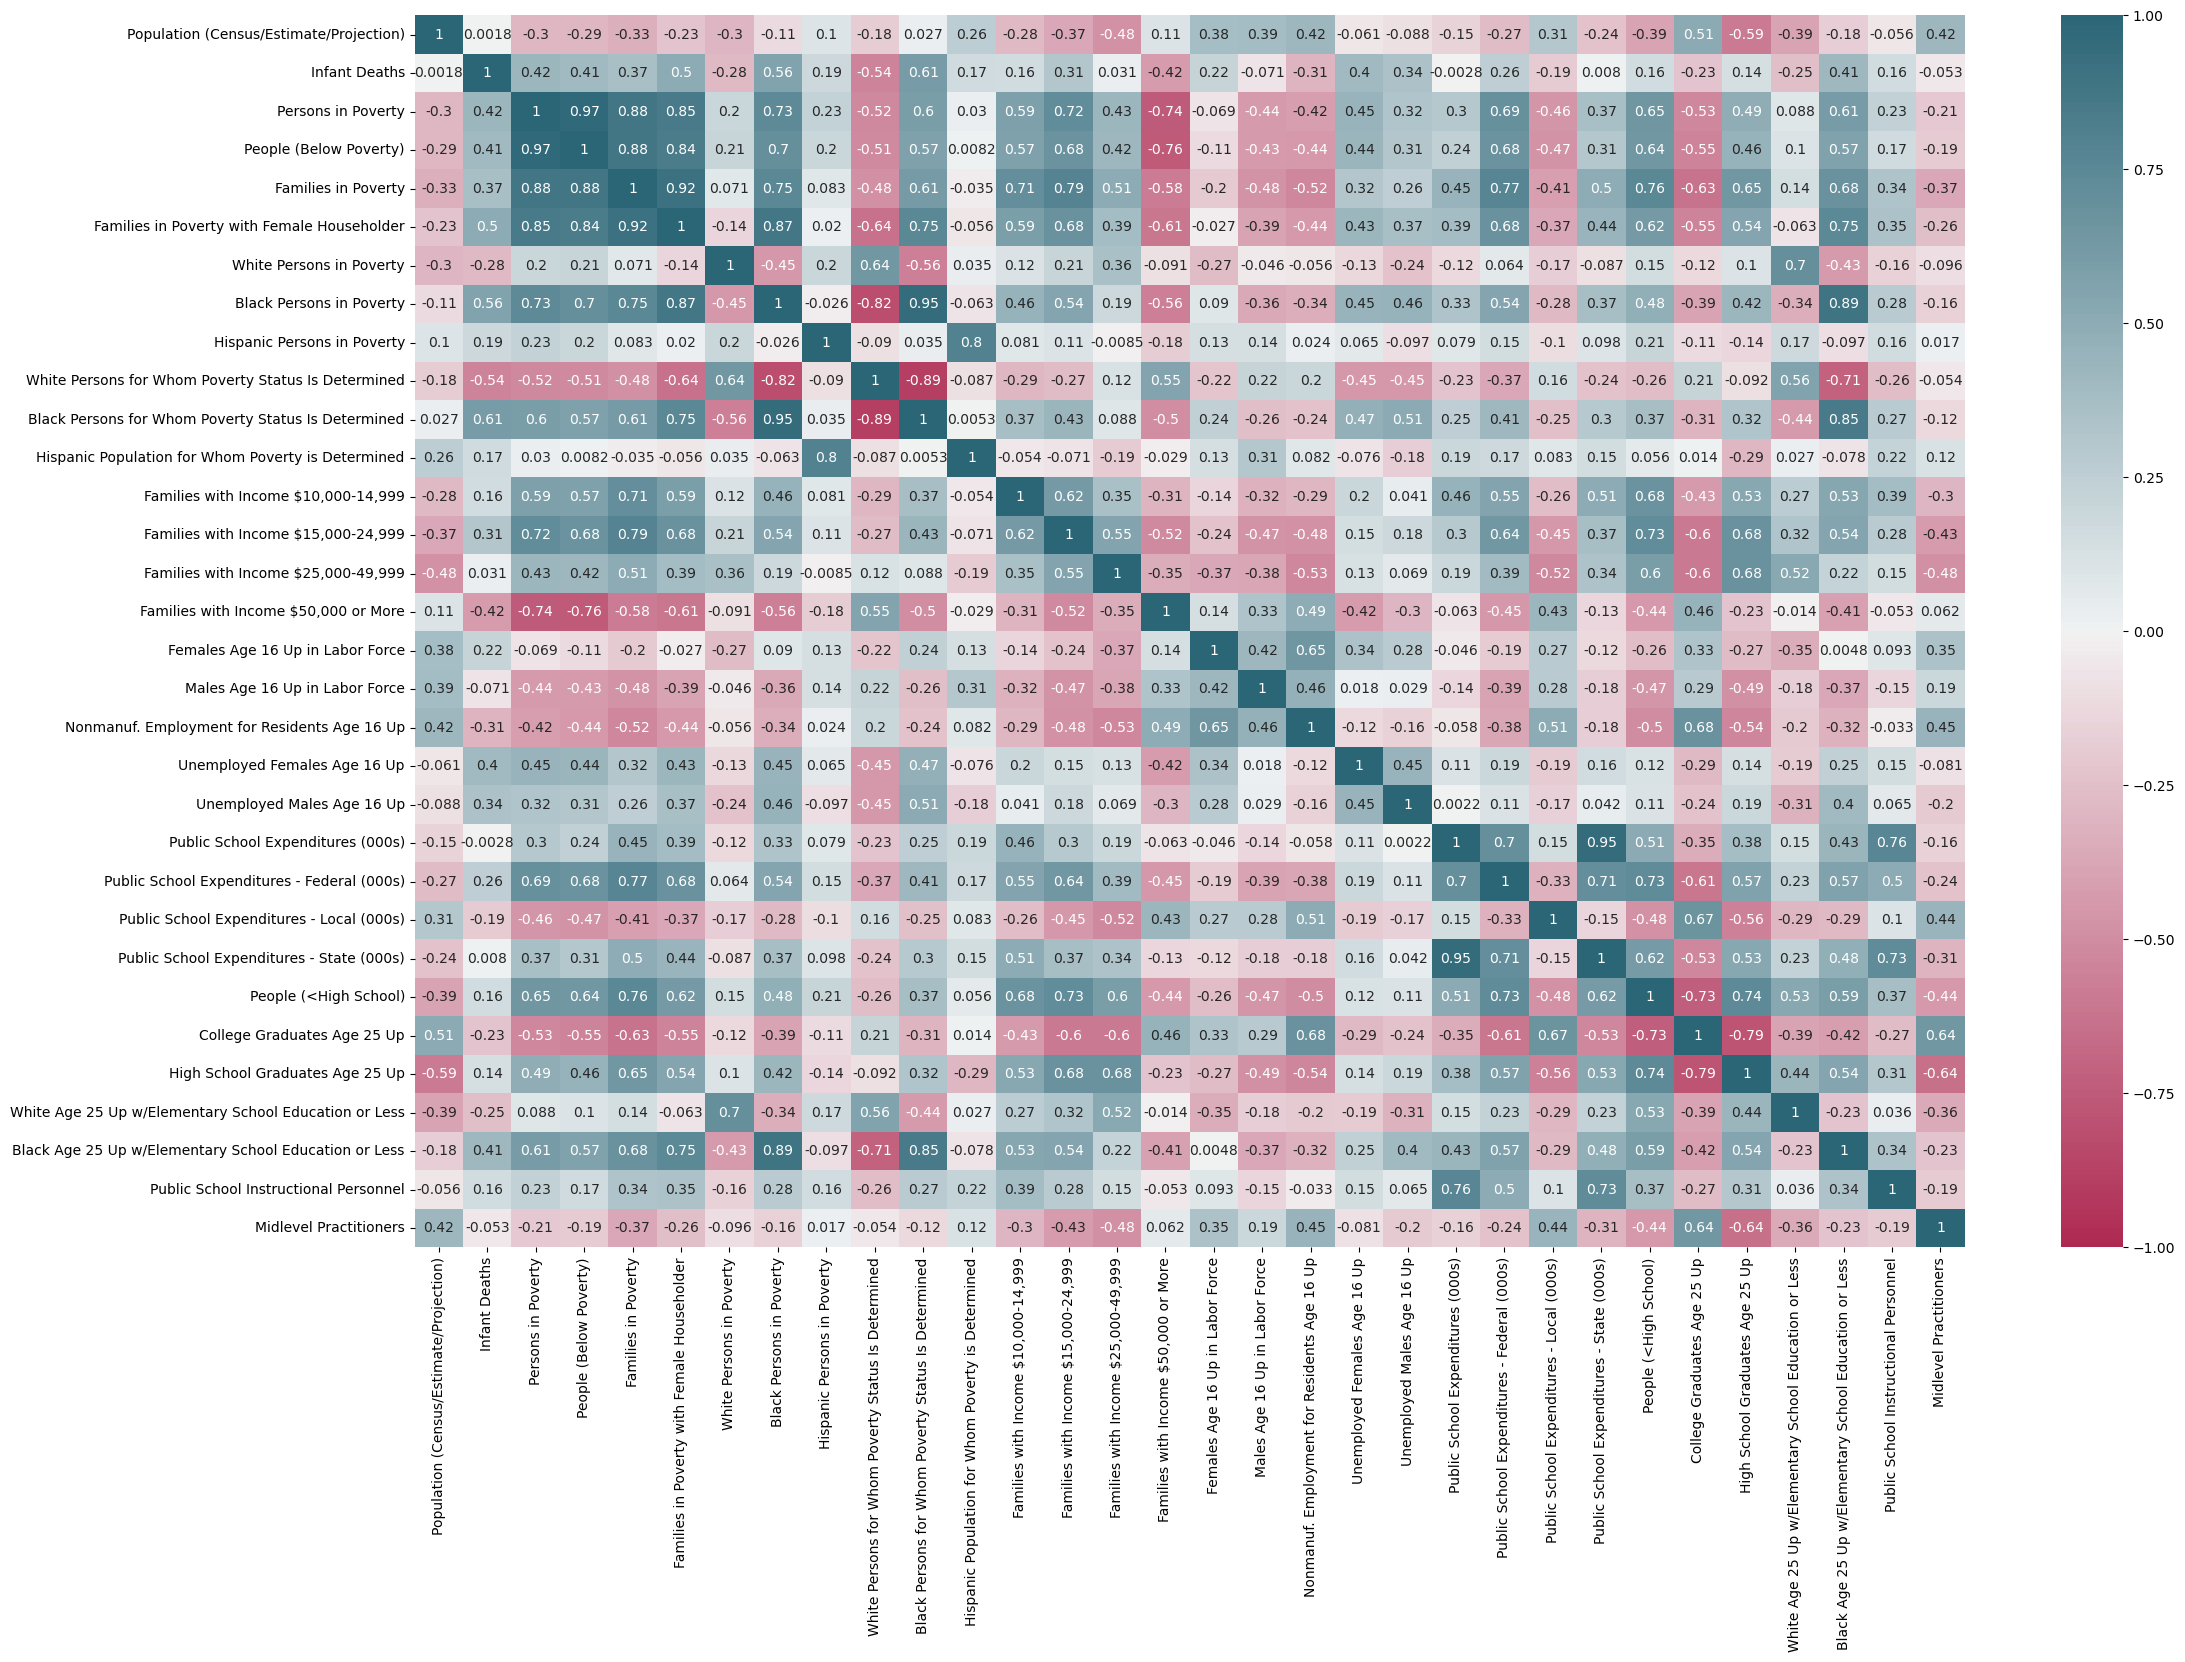

In [15]:
columns_that_correlate = ['Persons in Poverty',
                          'People (Below Poverty)',
                          'Families in Poverty',
                          'Families in Poverty with Female Householder',
                          'White Persons in Poverty', 
                          'Black Persons in Poverty',
                          'Hispanic Persons in Poverty', 
                          'White Persons for Whom Poverty Status Is Determined',
                          'Black Persons for Whom Poverty Status Is Determined',
                          'Hispanic Population for Whom Poverty is Determined',
                          'Families with Income $10,000-14,999',
                          'Families with Income $15,000-24,999',
                          'Families with Income $25,000-49,999',
                          'Families with Income $50,000 or More',
                          'Females Age 16 Up in Labor Force',
                          'Males Age 16 Up in Labor Force',
                          'Nonmanuf. Employment for Residents Age 16 Up',
                          'Unemployed Females Age 16 Up',
                          'Unemployed Males Age 16 Up',
                          'Public School Expenditures (000s)',
                          'Public School Expenditures - Federal (000s)',
                          'Public School Expenditures - Local (000s)',
                          'Public School Expenditures - State (000s)',
                          'People (<High School)',
                          'College Graduates Age 25 Up',
                          'High School Graduates Age 25 Up',
                          'White Age 25 Up w/Elementary School Education or Less',
                          'Black Age 25 Up w/Elementary School Education or Less',
                          'Public School Instructional Personnel',
                          'Midlevel Practitioners'

                          ]

per_thousand_columns =  columns_that_correlate + \
                        ['Infant Deaths']
                        


Correlated_df = Master_NC_Dataframe[['County', 'Population (Census/Estimate/Projection)', 'Infant Deaths'] + columns_that_correlate] 

for column in per_thousand_columns:
    Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000

plt.figure(figsize=(25,16))
sns.heatmap(Correlated_df.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\415073473.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000


R-squared for People (Below Poverty) vs Persons in Poverty: 0.9307422176849587


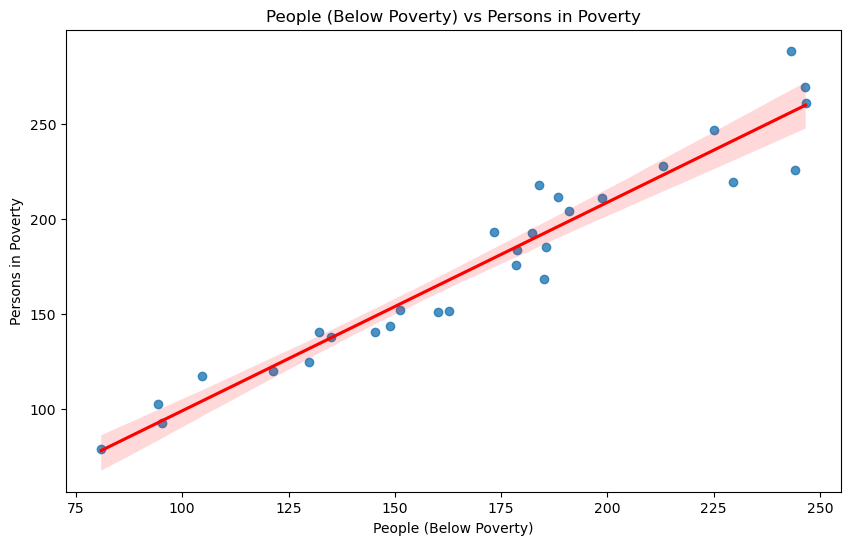

R-squared for Families in Poverty vs Persons in Poverty: 0.8247535003852189


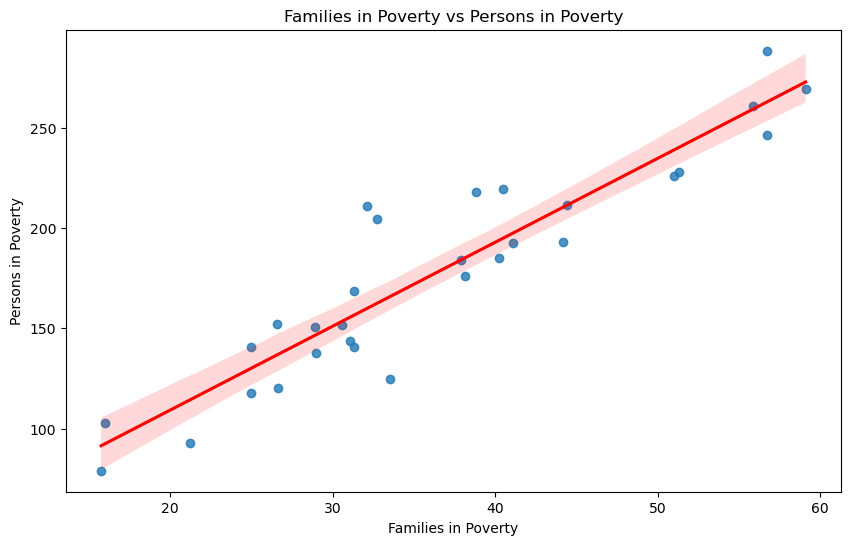

R-squared for Families in Poverty with Female Householder vs Persons in Poverty: 0.831738857956248


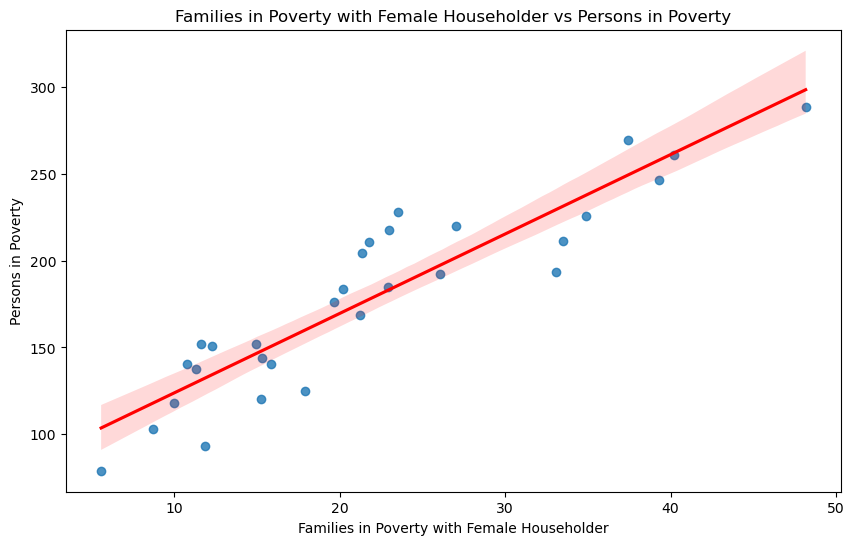

R-squared for Persons in Poverty vs People (Below Poverty): 0.9285419258524057


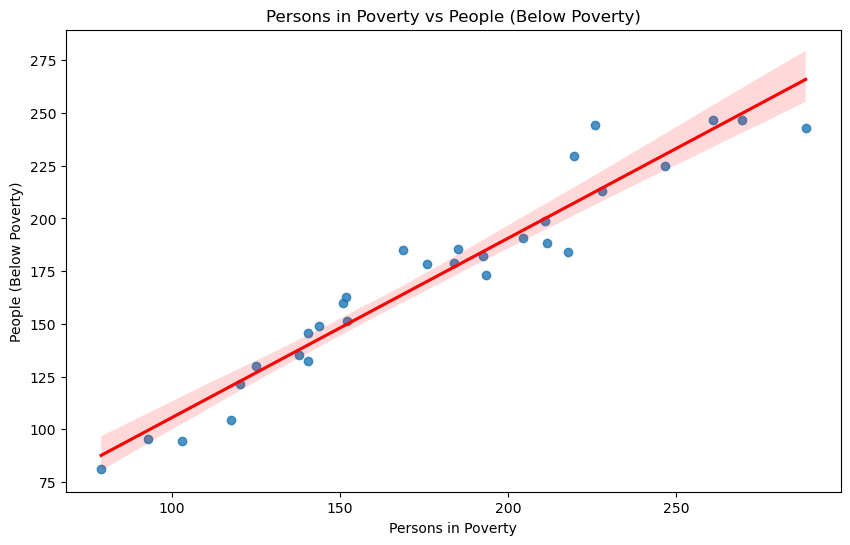

R-squared for Families in Poverty vs People (Below Poverty): 0.7962313676937945


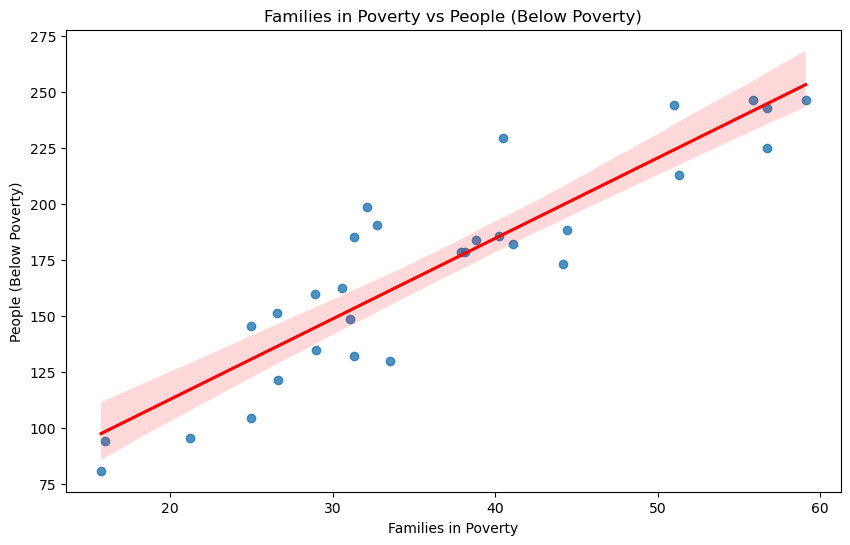

R-squared for Families in Poverty with Female Householder vs People (Below Poverty): 0.72604991715939


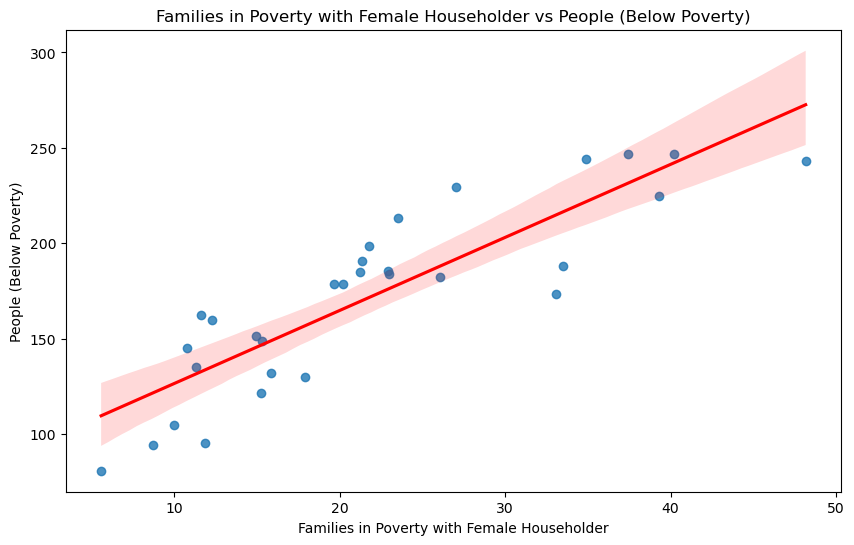

R-squared for Persons in Poverty vs Families in Poverty: 0.8557910783137318


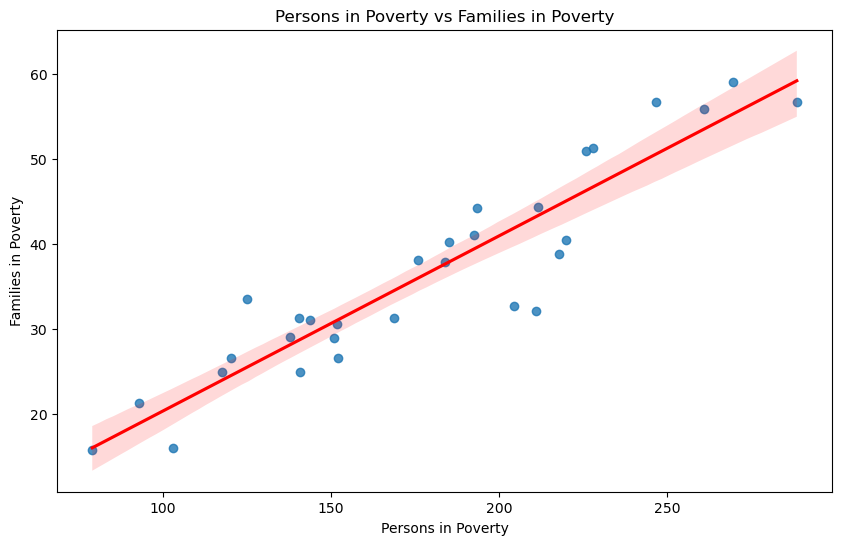

R-squared for People (Below Poverty) vs Families in Poverty: 0.8167662711809244


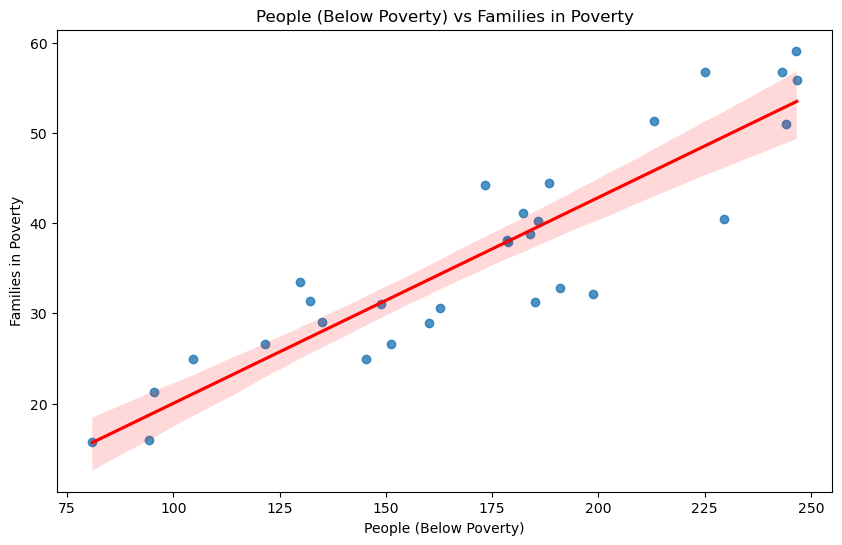

R-squared for Families in Poverty with Female Householder vs Families in Poverty: 0.733779415992802


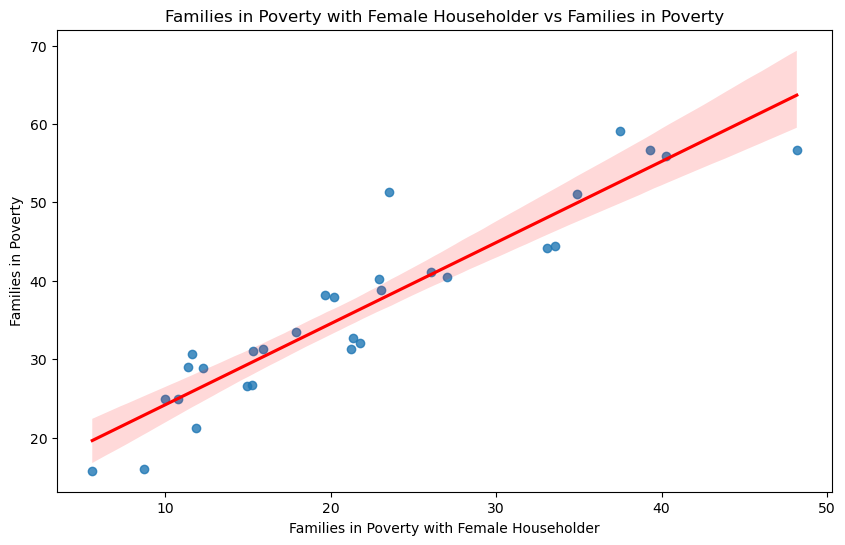

R-squared for Persons in Poverty vs Families in Poverty with Female Householder: 0.6991536305176491


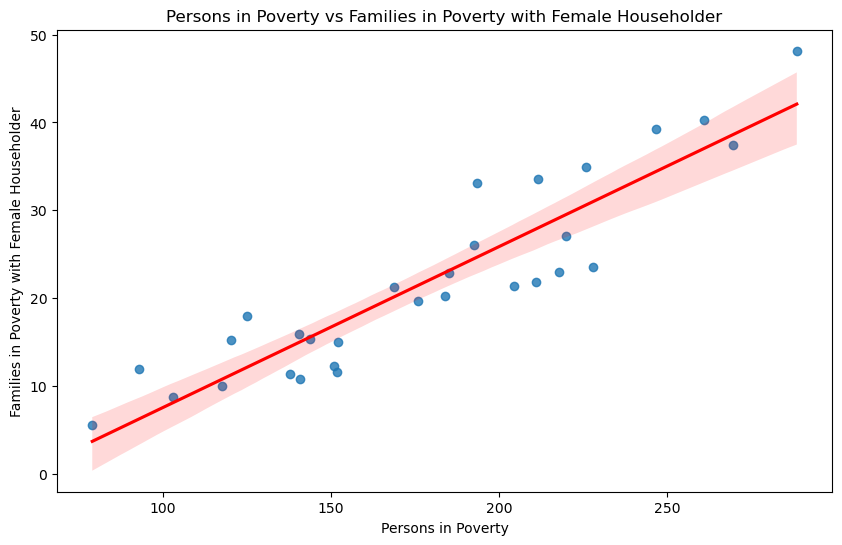

R-squared for Families in Poverty vs Families in Poverty with Female Householder: 0.7525536173886842


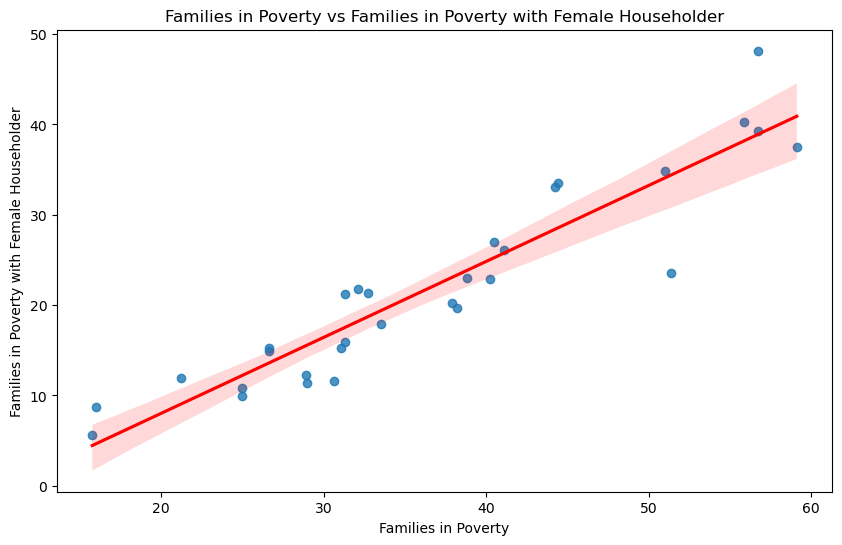

R-squared for Black Persons in Poverty vs Families in Poverty with Female Householder: 0.6914589662676852


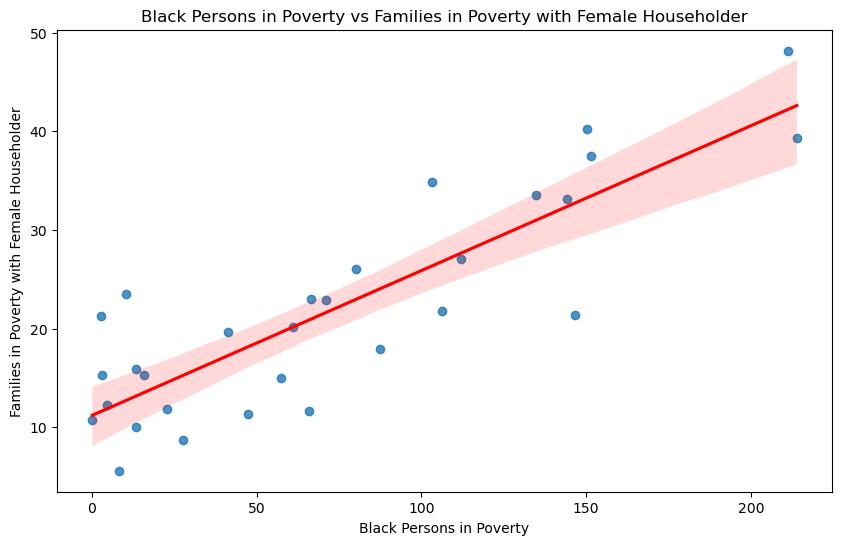

R-squared for Families in Poverty with Female Householder vs Black Persons in Poverty: 0.7285509228267647


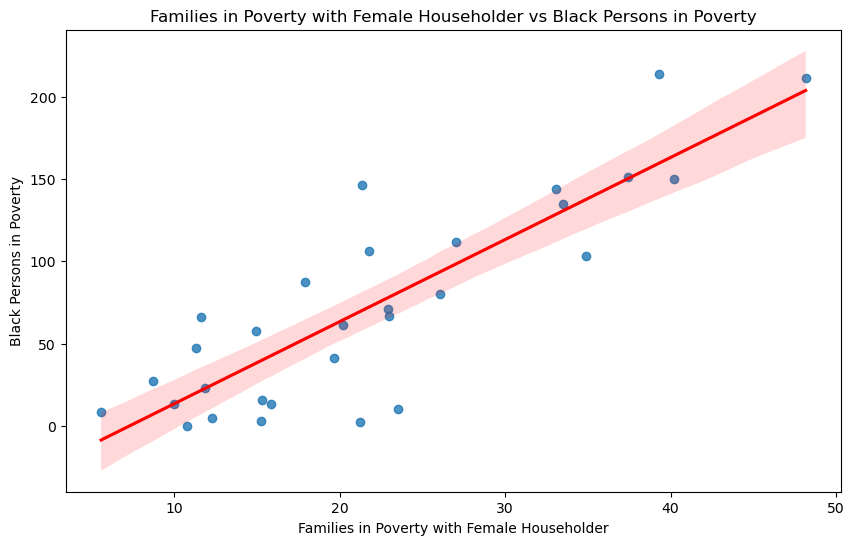

R-squared for Black Persons for Whom Poverty Status Is Determined vs Black Persons in Poverty: 0.8487856530029193


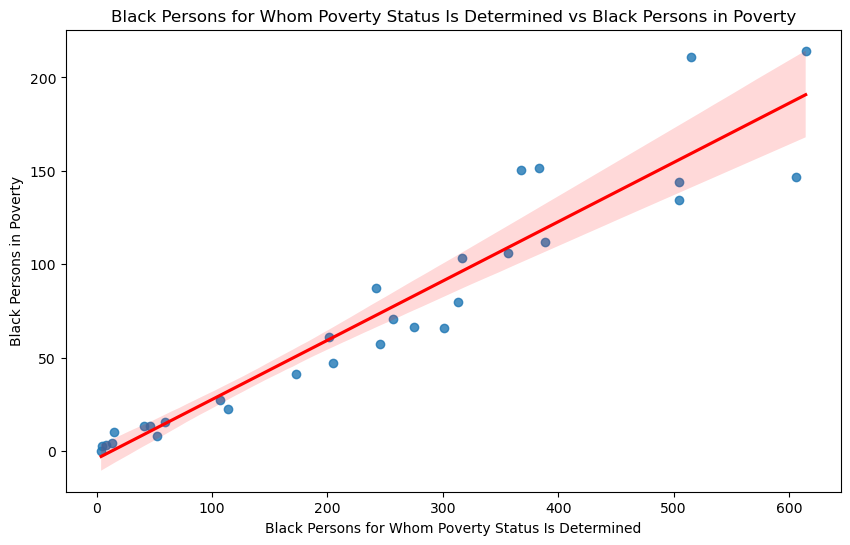

R-squared for Black Age 25 Up w/Elementary School Education or Less vs Black Persons in Poverty: 0.7996081033251674


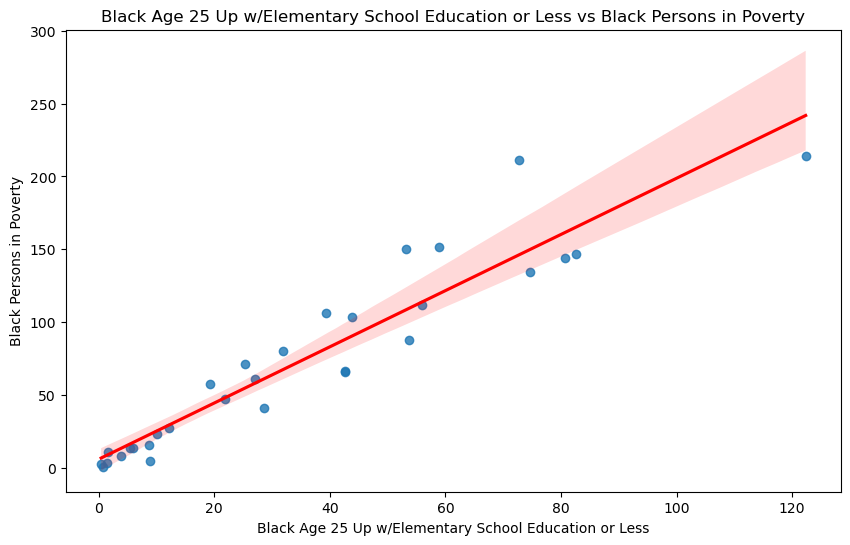

R-squared for Hispanic Population for Whom Poverty is Determined vs Hispanic Persons in Poverty: 0.7244346835524842


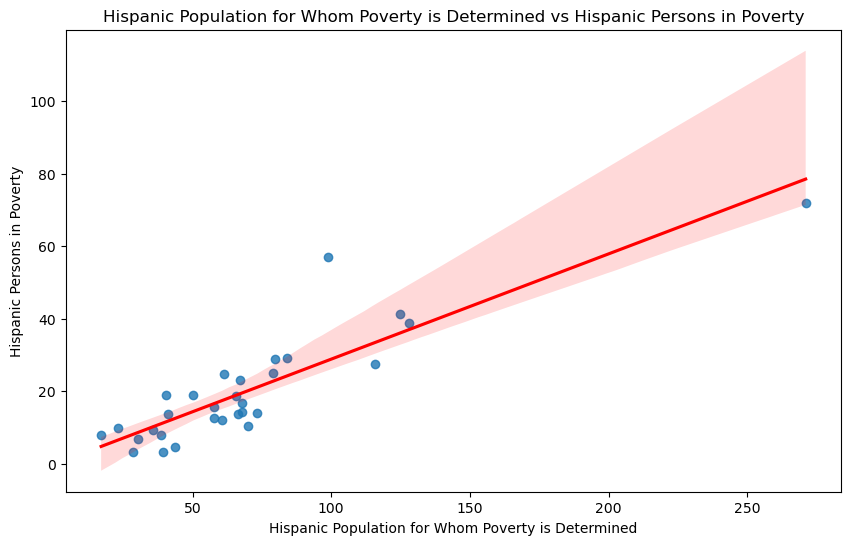

R-squared for Black Persons for Whom Poverty Status Is Determined vs White Persons for Whom Poverty Status Is Determined: 0.783659373571856


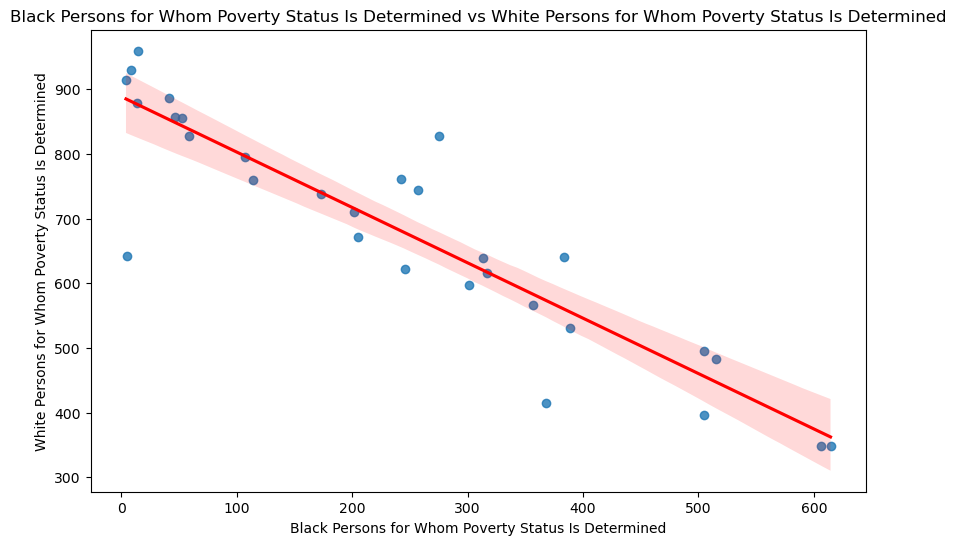

R-squared for Black Age 25 Up w/Elementary School Education or Less vs White Persons for Whom Poverty Status Is Determined: 0.7092509119288013


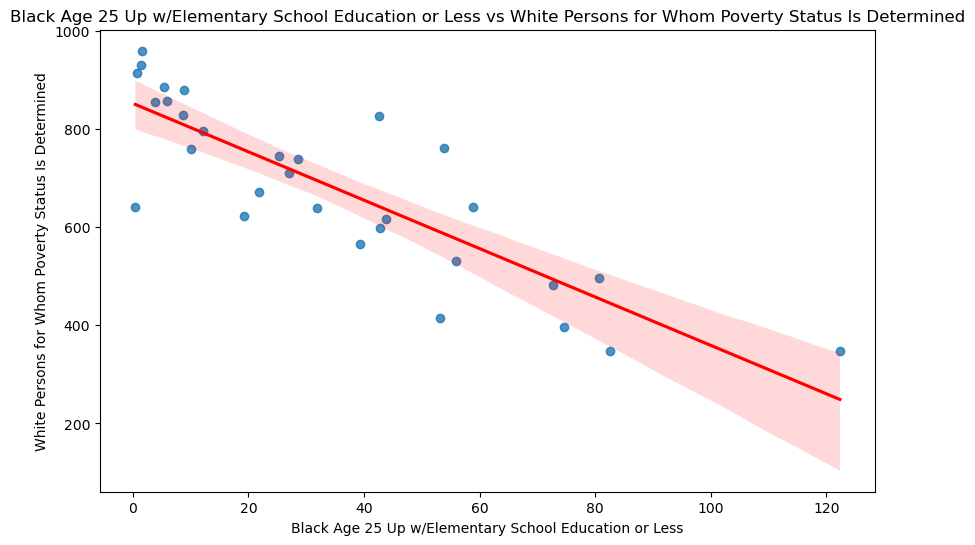

R-squared for Black Persons in Poverty vs Black Persons for Whom Poverty Status Is Determined: 0.8449067842105298


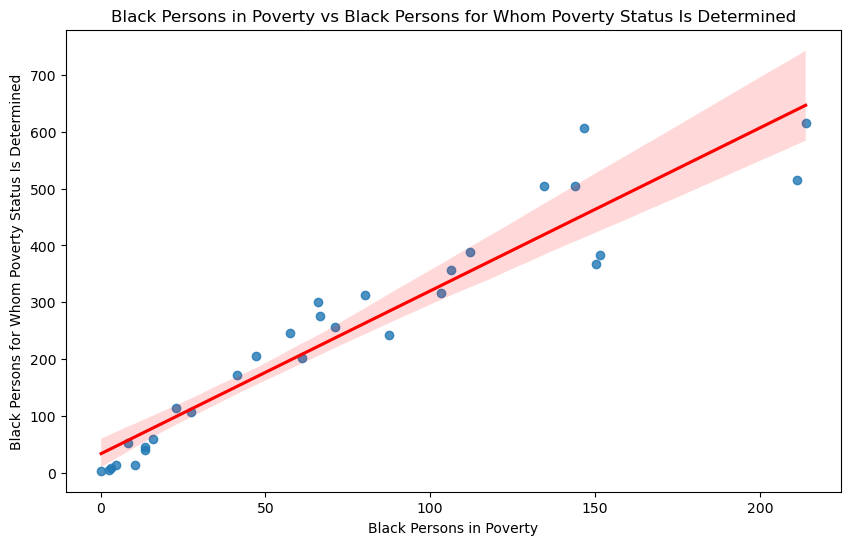

R-squared for White Persons for Whom Poverty Status Is Determined vs Black Persons for Whom Poverty Status Is Determined: 0.7700653759714937


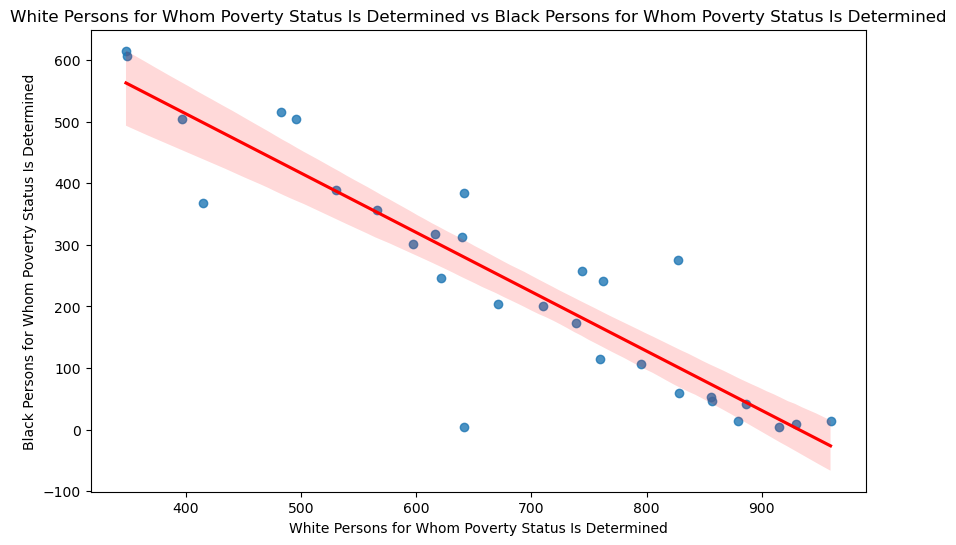

R-squared for Black Age 25 Up w/Elementary School Education or Less vs Black Persons for Whom Poverty Status Is Determined: 0.8751652209282369


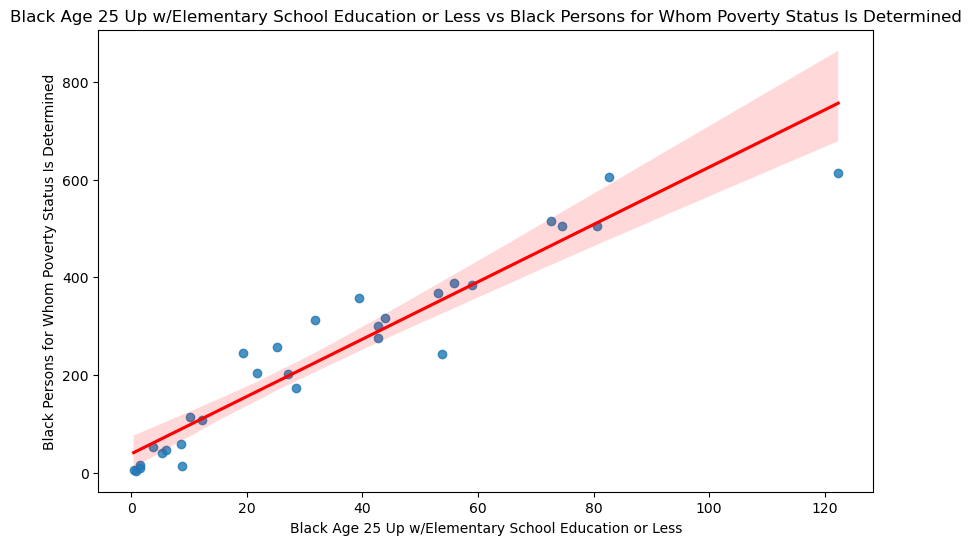

R-squared for Hispanic Persons in Poverty vs Hispanic Population for Whom Poverty is Determined: 0.7519219593268555


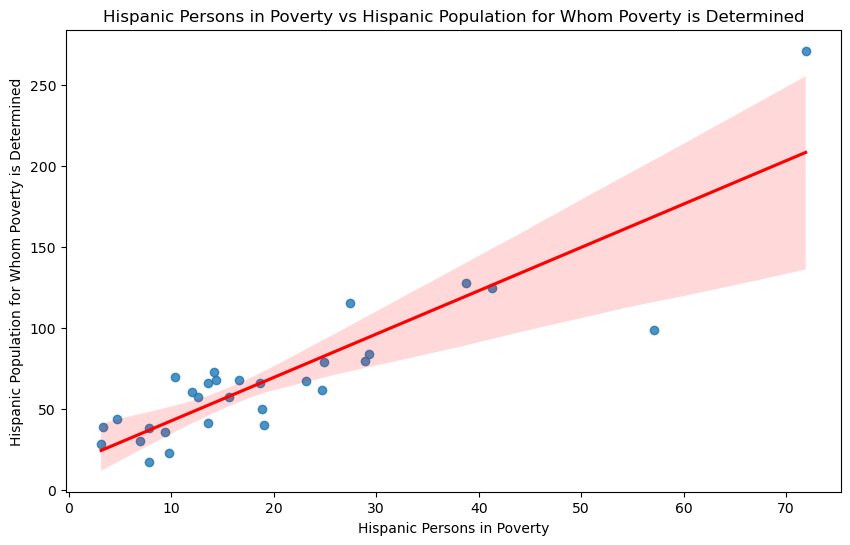

R-squared for Public School Expenditures - State (000s) vs Public School Expenditures (000s): 0.8560754925925907


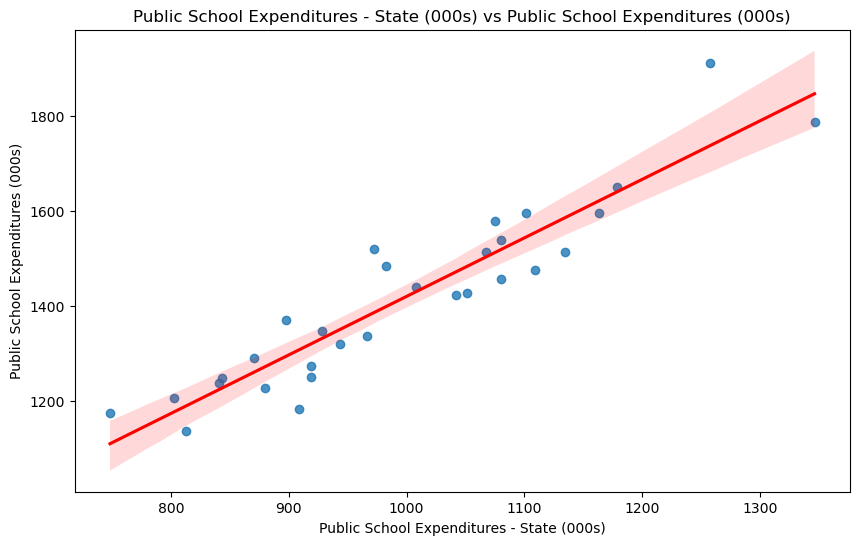

R-squared for People (Below Poverty) vs Public School Expenditures - Federal (000s): 0.6943429256006501


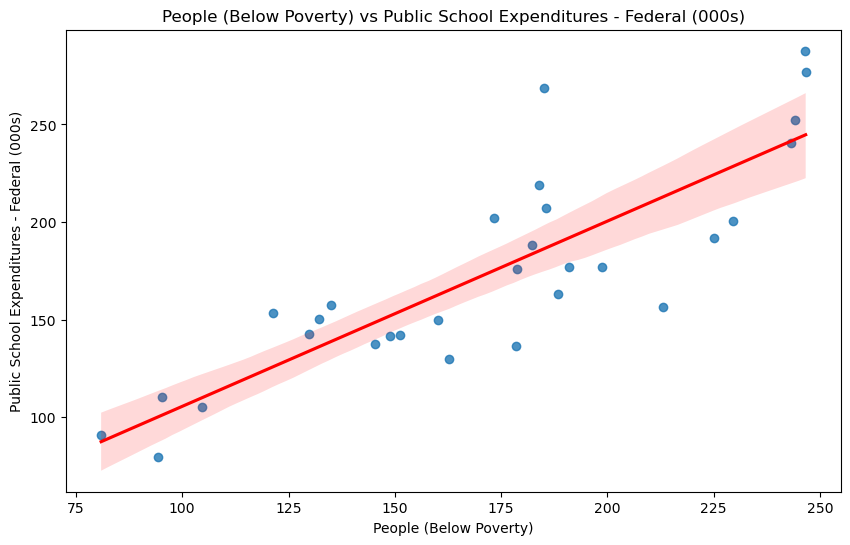

R-squared for Public School Expenditures (000s) vs Public School Expenditures - State (000s): 0.8424122214302167


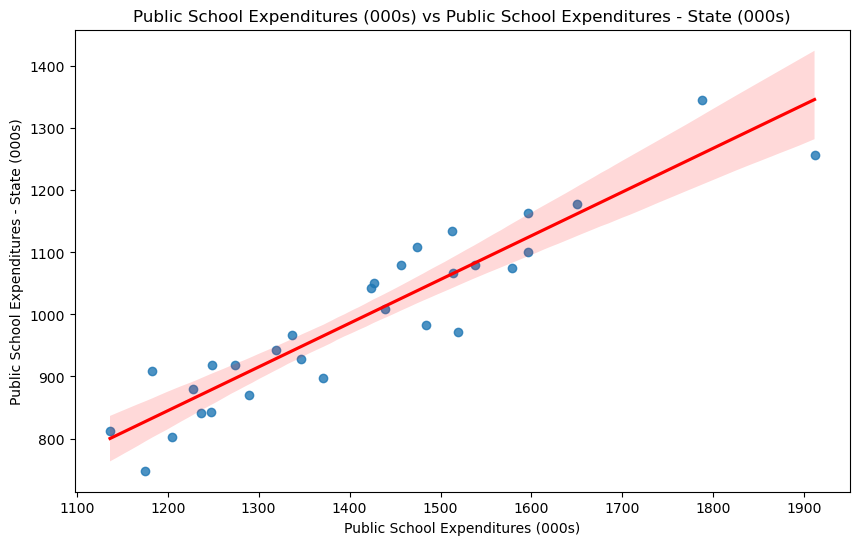

R-squared for Black Persons in Poverty vs Black Age 25 Up w/Elementary School Education or Less: 0.8731740570003705


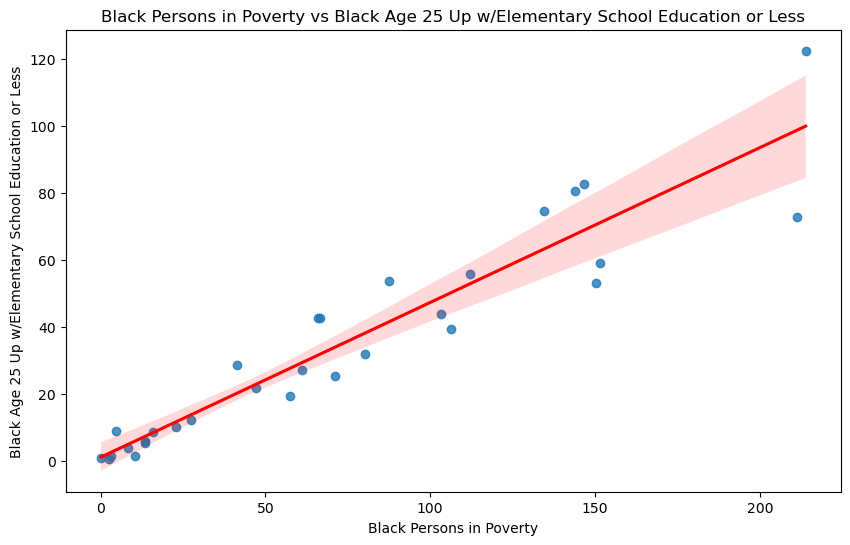

R-squared for Black Persons for Whom Poverty Status Is Determined vs Black Age 25 Up w/Elementary School Education or Less: 0.8720599476502793


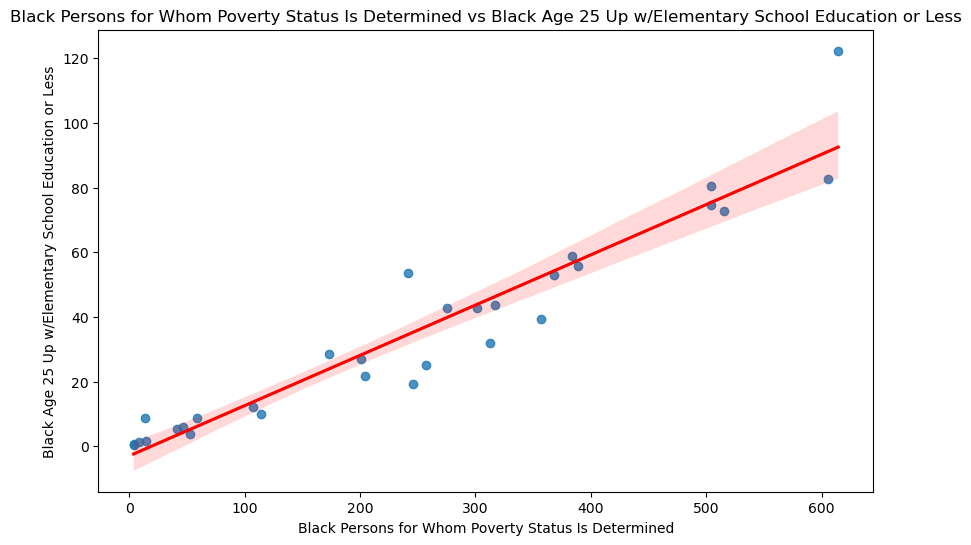

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

columns_that_correlate = ['Persons in Poverty',
                          'People (Below Poverty)',
                          'Families in Poverty',
                          'Families in Poverty with Female Householder',
                          'White Persons in Poverty', 
                          'Black Persons in Poverty',
                          'Hispanic Persons in Poverty', 
                          'White Persons for Whom Poverty Status Is Determined',
                          'Black Persons for Whom Poverty Status Is Determined',
                          'Hispanic Population for Whom Poverty is Determined',
                          'Families with Income $10,000-14,999',
                          'Families with Income $15,000-24,999',
                          'Families with Income $25,000-49,999',
                          'Families with Income $50,000 or More',
                          'Females Age 16 Up in Labor Force',
                          'Males Age 16 Up in Labor Force',
                          'Nonmanuf. Employment for Residents Age 16 Up',
                          'Unemployed Females Age 16 Up',
                          'Unemployed Males Age 16 Up',
                          'Public School Expenditures (000s)',
                          'Public School Expenditures - Federal (000s)',
                          'Public School Expenditures - Local (000s)',
                          'Public School Expenditures - State (000s)',
                          'People (<High School)',
                          'College Graduates Age 25 Up',
                          'High School Graduates Age 25 Up',
                          'White Age 25 Up w/Elementary School Education or Less',
                          'Black Age 25 Up w/Elementary School Education or Less',
                          'Public School Instructional Personnel',
                          'Midlevel Practitioners'

                          ]

per_thousand_columns =  columns_that_correlate + \
                        ['Infant Deaths']
                        


Correlated_df = Master_NC_Dataframe[['County', 'Population (Census/Estimate/Projection)', 'Infant Deaths'] + columns_that_correlate] 

for column in per_thousand_columns:
    Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000

# Response variable
for column_y in Correlated_df.columns:
    # do not include the column county
    if column_y != 'County':
        # Loop over each column_x
        for column_x in columns_that_correlate:
            X = Correlated_df[[column_x]]

            # Split the data into training and test sets
            X_train, X_test, column_y_train, column_y_test = train_test_split(X, Correlated_df[column_y], test_size=0.3, random_state=0)

            # Create a Linear Regression model
            model = LinearRegression()

            # Train the model
            model.fit(X_train, column_y_train)
            
            # Make predictions
            column_y_pred = model.predict(X_test)

            if metrics.r2_score(column_y_test, column_y_pred) > 0.69 and abs(metrics.r2_score(column_y_test, column_y_pred)) !=1:
                
                # Evaluate the model
                print(f'R-squared for {column_x} vs {column_y}:', metrics.r2_score(column_y_test, column_y_pred))

                # Plot regression
                plt.figure(figsize=(10, 6))
                sns.regplot(x=X_test, y=column_y_test, data=Correlated_df, line_kws={"color": "red"})
                plt.title(f'{column_x} vs {column_y}')
                plt.show()



R-squared for Persons in Poverty vs Families in Poverty with Female Householder: 0.9445563896022869


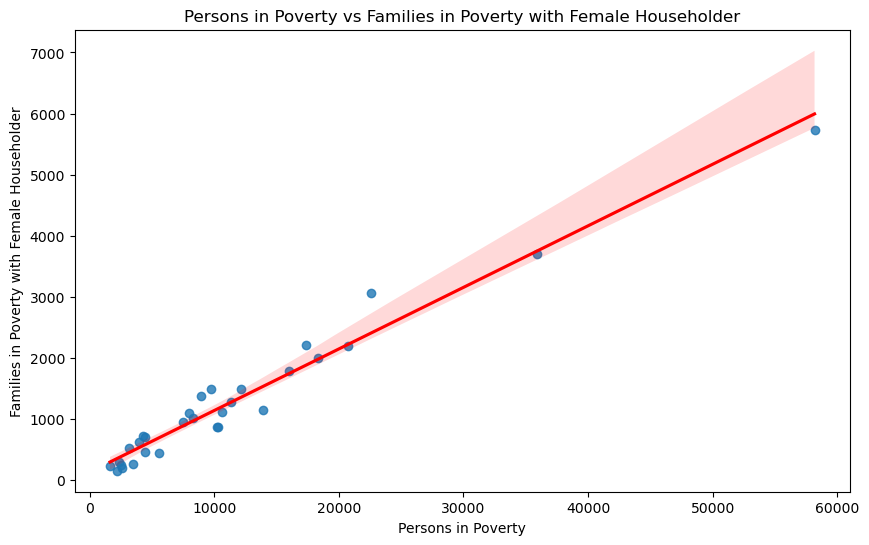

R-squared for People (Below Poverty) vs Families in Poverty with Female Householder: 0.9426960628226517


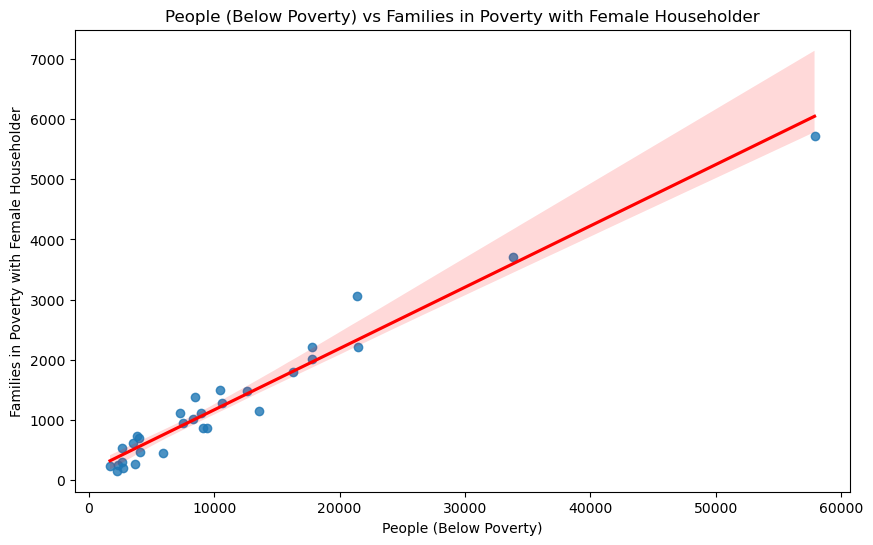

R-squared for Families in Poverty vs Families in Poverty with Female Householder: 0.9583769569910595


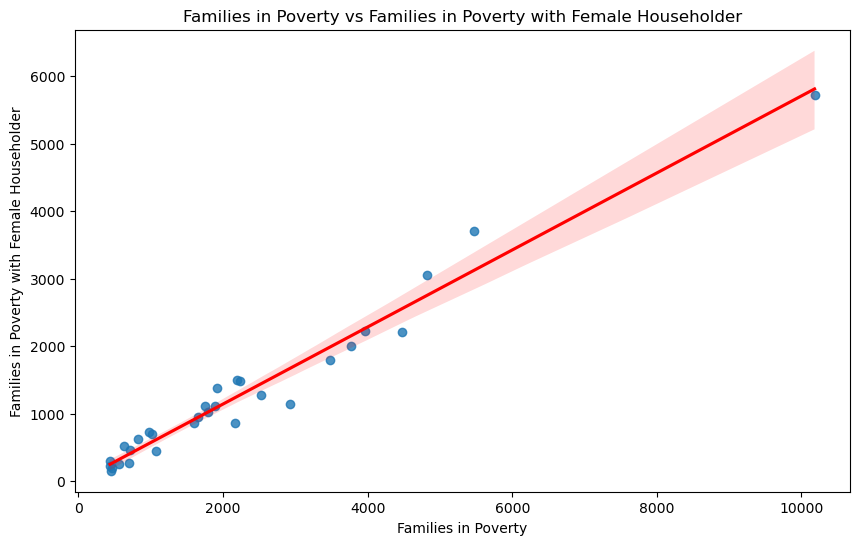

R-squared for White Persons in Poverty vs Families in Poverty with Female Householder: 0.8053178586329952


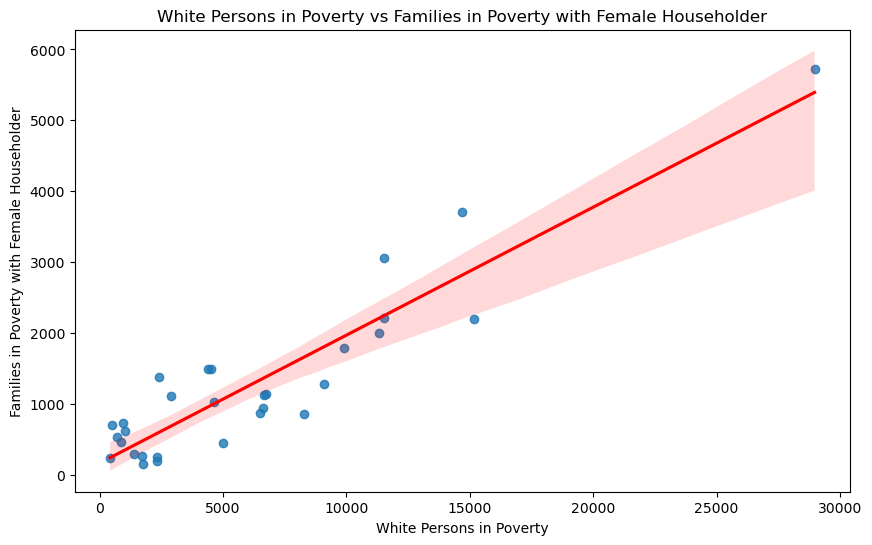

R-squared for Black Persons in Poverty vs Families in Poverty with Female Householder: 0.8385002200083129


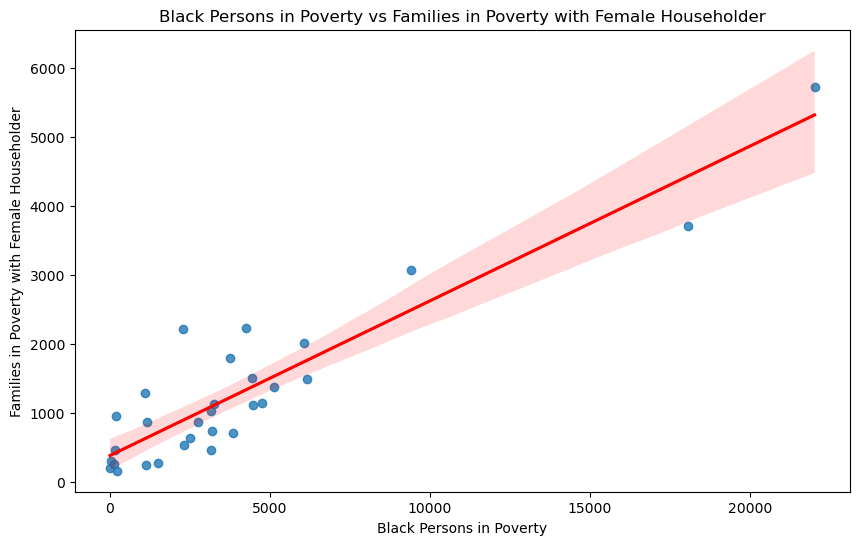

R-squared for Hispanic Persons in Poverty vs Families in Poverty with Female Householder: 0.7005890891270135


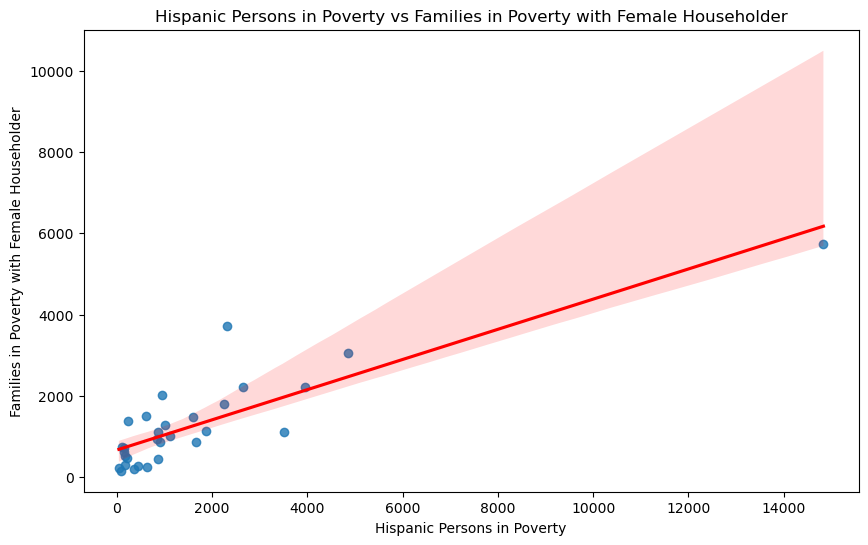

R-squared for Black Persons for Whom Poverty Status Is Determined vs Families in Poverty with Female Householder: 0.7522773084095562


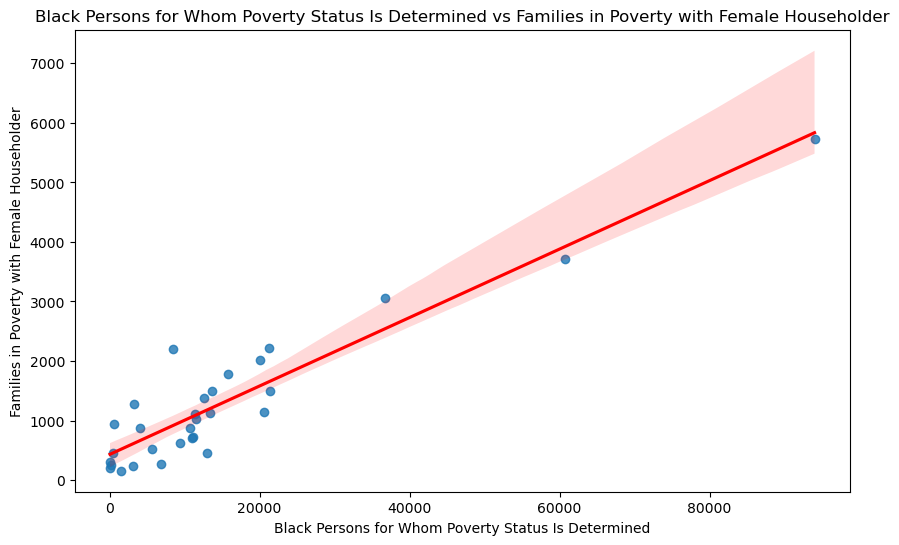

R-squared for Hispanic Population for Whom Poverty is Determined vs Families in Poverty with Female Householder: 0.6902519954427354


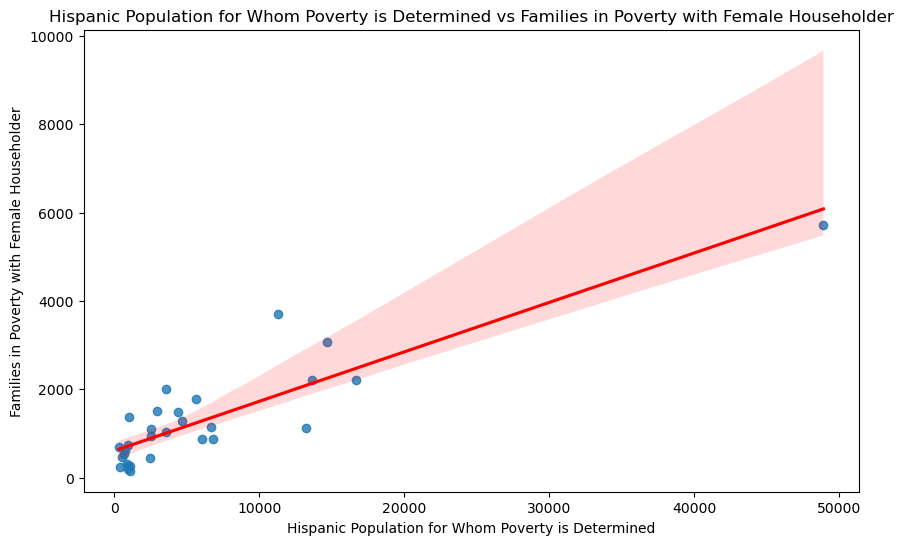

R-squared for Families with Income $10,000-14,999 vs Families in Poverty with Female Householder: 0.9042072115444981


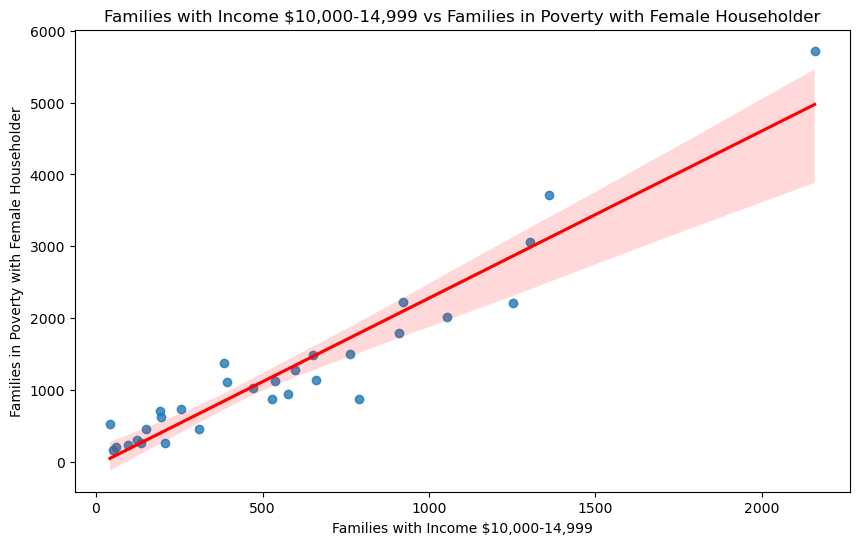

R-squared for Families with Income $15,000-24,999 vs Families in Poverty with Female Householder: 0.897240735145387


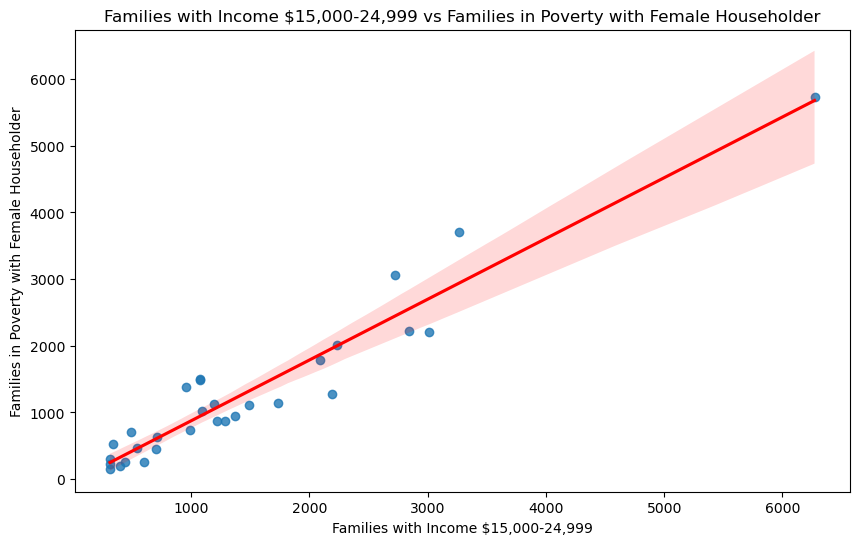

R-squared for Families with Income $25,000-49,999 vs Families in Poverty with Female Householder: 0.8310706663983796


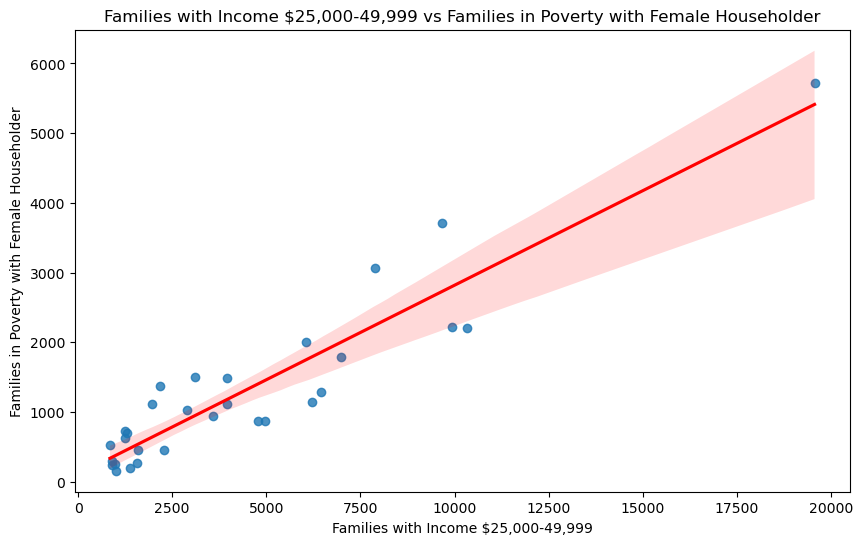

R-squared for Females Age 16 Up in Labor Force vs Families in Poverty with Female Householder: 0.6982596144366797


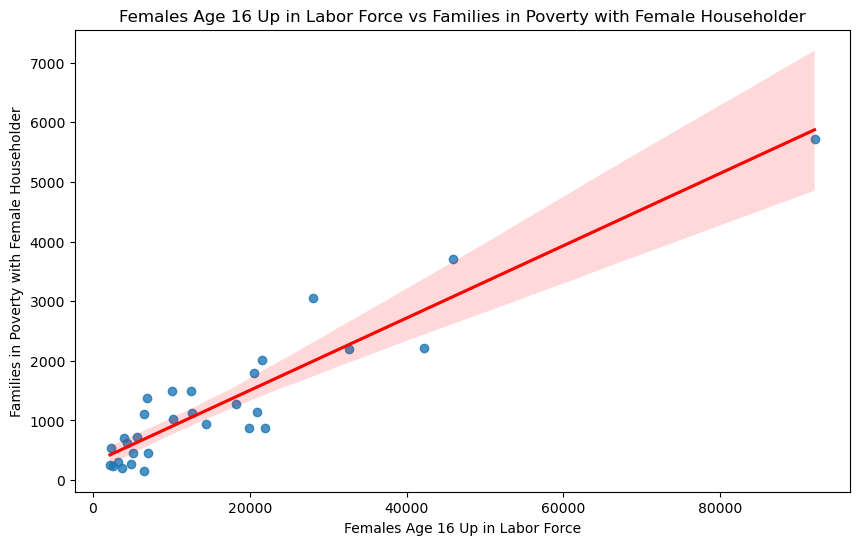

R-squared for Unemployed Females Age 16 Up vs Families in Poverty with Female Householder: 0.8145596973885233


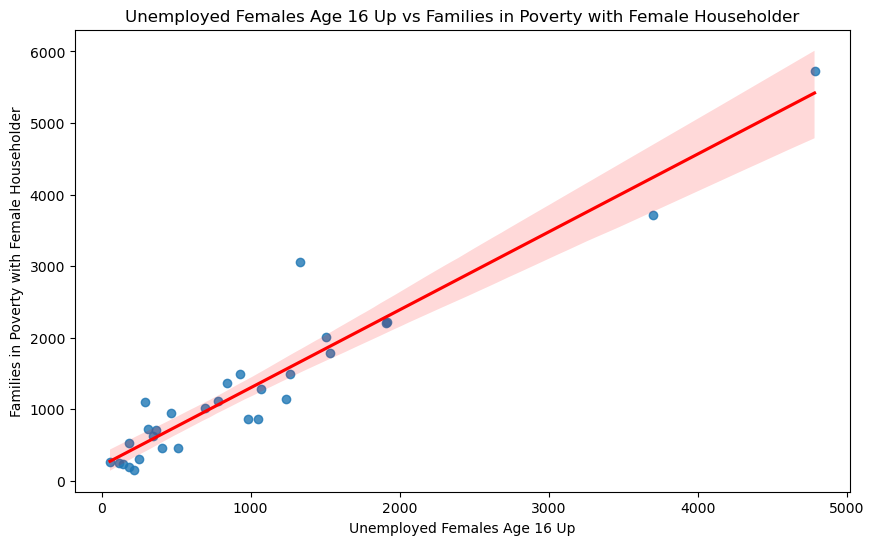

R-squared for Unemployed Males Age 16 Up vs Families in Poverty with Female Householder: 0.7638534609779697


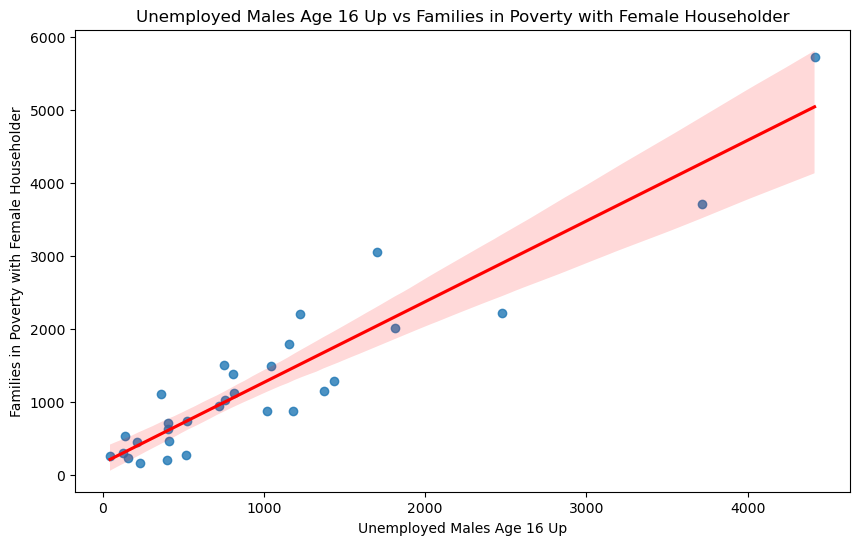

R-squared for Public School Expenditures (000s) vs Families in Poverty with Female Householder: 0.7421110579305632


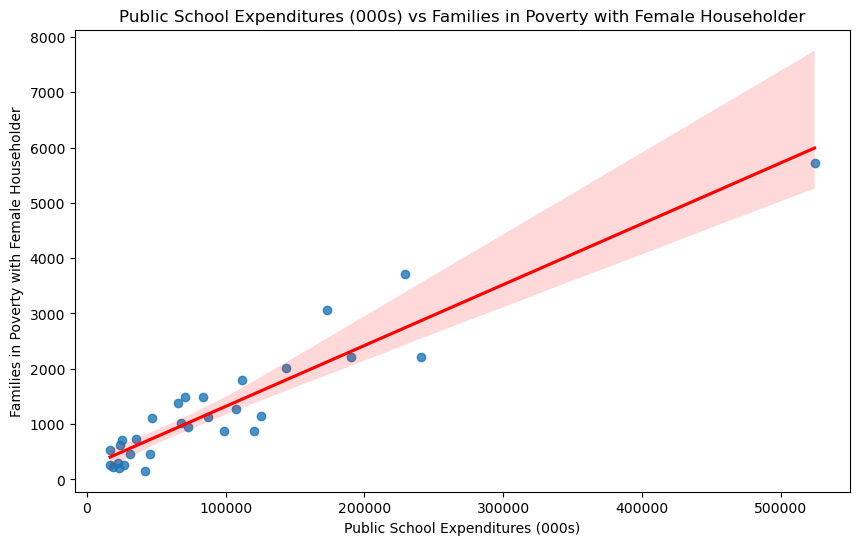

R-squared for Public School Expenditures - Federal (000s) vs Families in Poverty with Female Householder: 0.9242582727915738


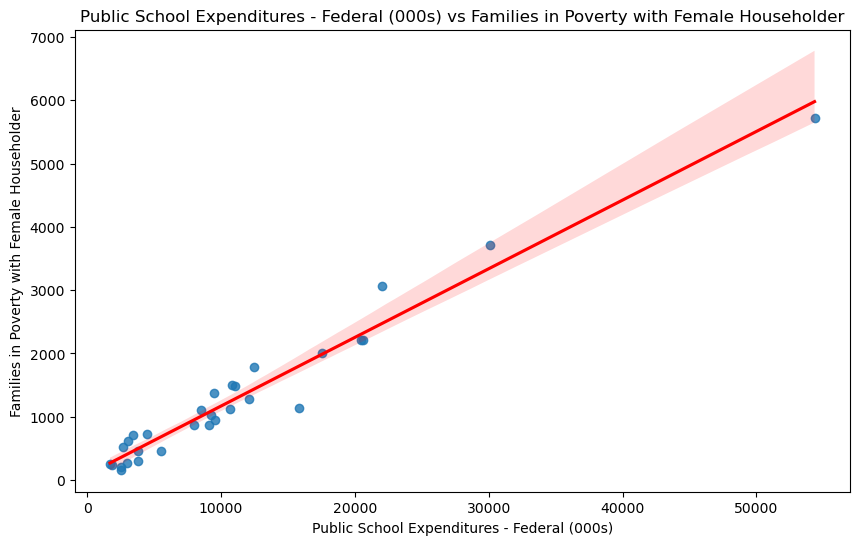

R-squared for Public School Expenditures - State (000s) vs Families in Poverty with Female Householder: 0.7753607816948092


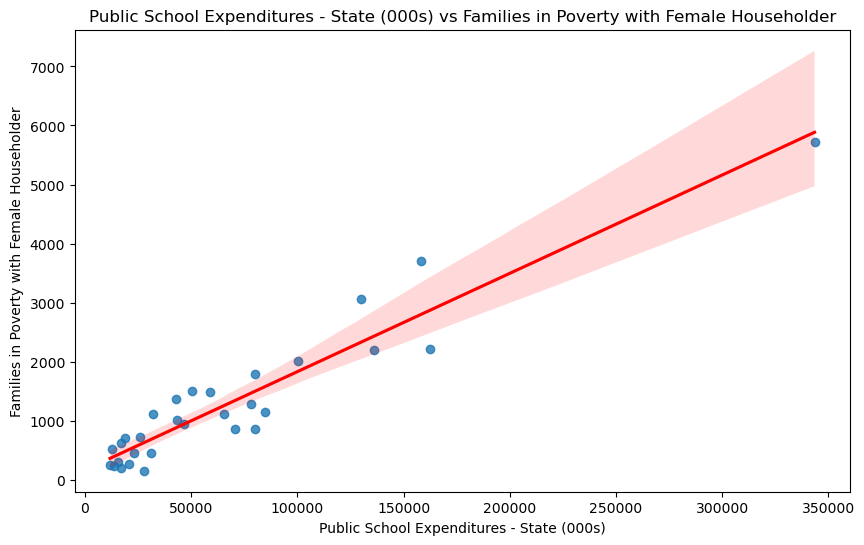

R-squared for People (<High School) vs Families in Poverty with Female Householder: 0.8142825410410566


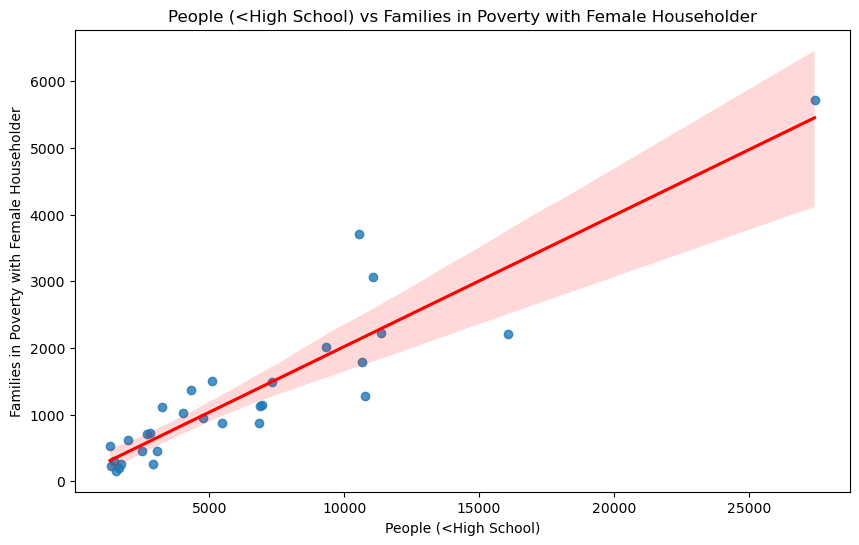

R-squared for High School Graduates Age 25 Up vs Families in Poverty with Female Householder: 0.7993640655044773


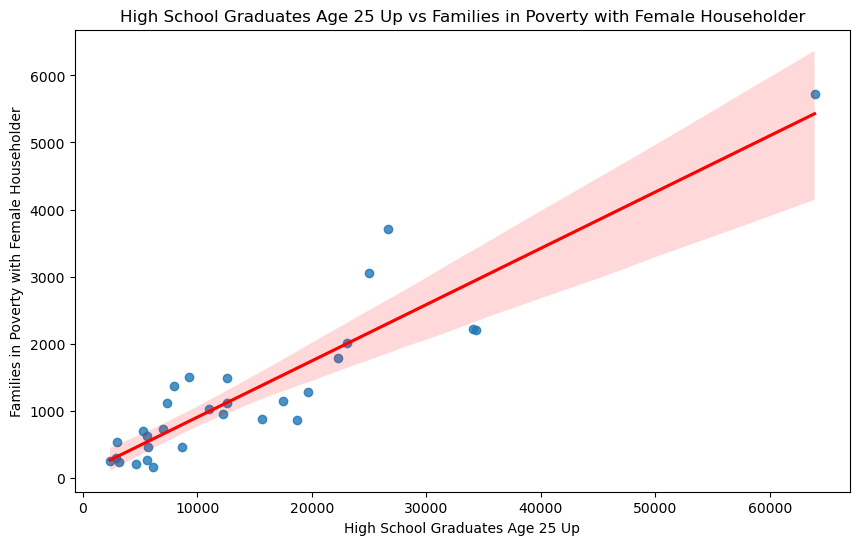

R-squared for Black Age 25 Up w/Elementary School Education or Less vs Families in Poverty with Female Householder: 0.7952856641239272


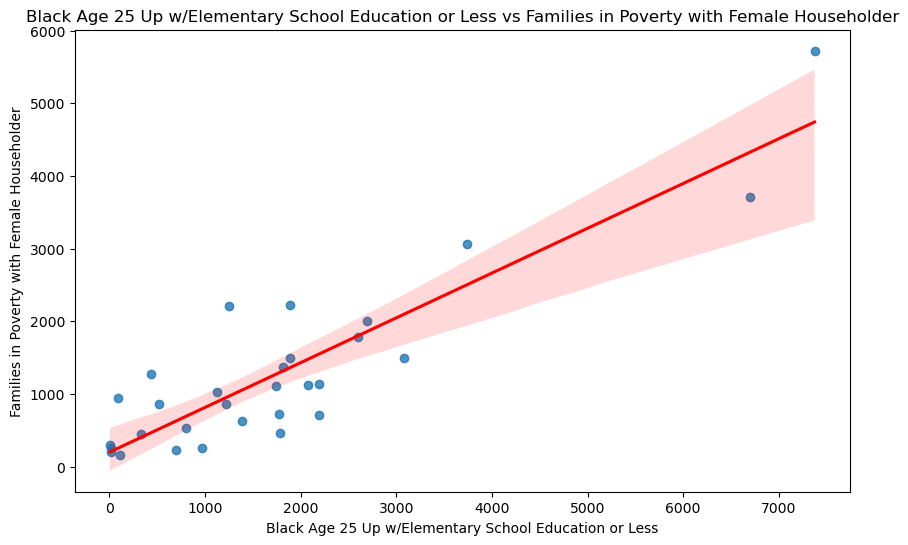

R-squared for Public School Instructional Personnel vs Families in Poverty with Female Householder: 0.7255691912758491


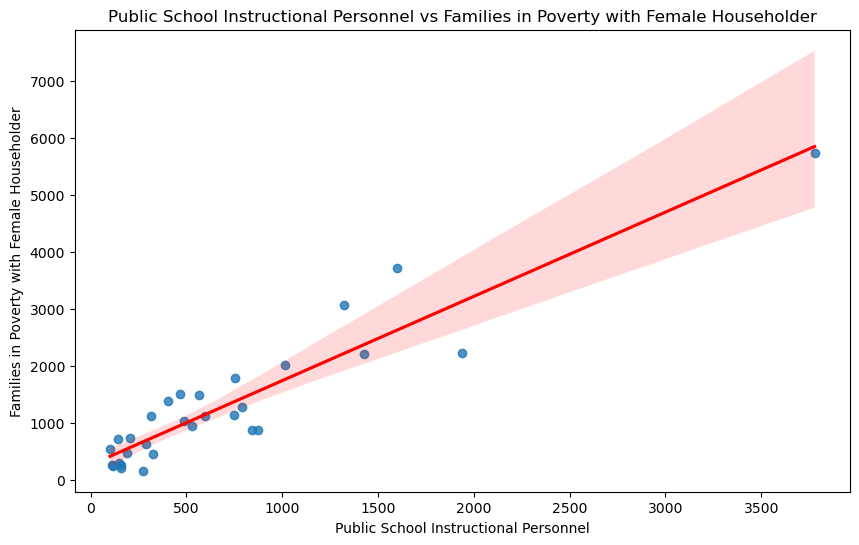

R-squared for Midlevel Practitioners vs Families in Poverty with Female Householder: 0.7269771873335387


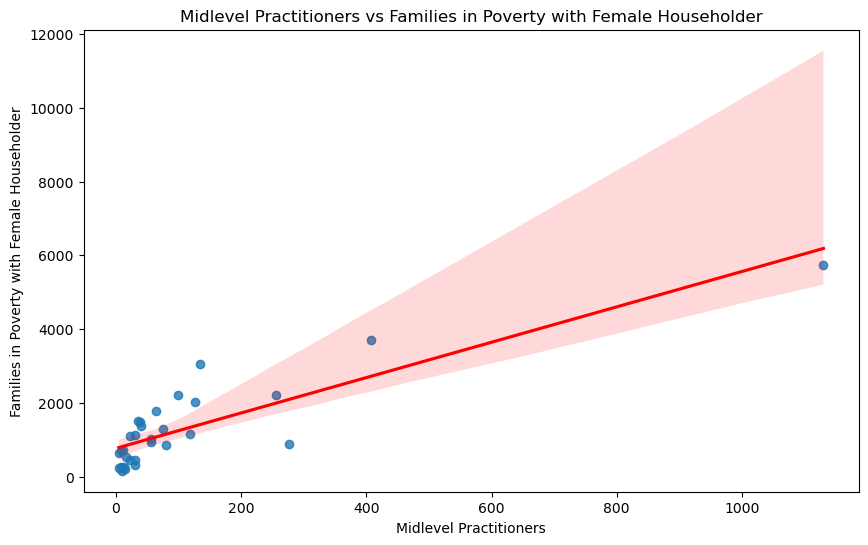

In [22]:
columns_that_correlate = ['Persons in Poverty',
                          'People (Below Poverty)',
                          'Families in Poverty',
                          'Families in Poverty with Female Householder',
                          'White Persons in Poverty', 
                          'Black Persons in Poverty',
                          'Hispanic Persons in Poverty', 
                          'White Persons for Whom Poverty Status Is Determined',
                          'Black Persons for Whom Poverty Status Is Determined',
                          'Hispanic Population for Whom Poverty is Determined',
                          'Families with Income $10,000-14,999',
                          'Families with Income $15,000-24,999',
                          'Families with Income $25,000-49,999',
                          'Families with Income $50,000 or More',
                          'Females Age 16 Up in Labor Force',
                          'Males Age 16 Up in Labor Force',
                          'Nonmanuf. Employment for Residents Age 16 Up',
                          'Unemployed Females Age 16 Up',
                          'Unemployed Males Age 16 Up',
                          'Public School Expenditures (000s)',
                          'Public School Expenditures - Federal (000s)',
                          'Public School Expenditures - Local (000s)',
                          'Public School Expenditures - State (000s)',
                          'People (<High School)',
                          'College Graduates Age 25 Up',
                          'High School Graduates Age 25 Up',
                          'White Age 25 Up w/Elementary School Education or Less',
                          'Black Age 25 Up w/Elementary School Education or Less',
                          'Public School Instructional Personnel',
                          'Midlevel Practitioners'

                          ]

per_thousand_columns =  columns_that_correlate + \
                        ['Infant Deaths']
                        


Correlated_df = Master_NC_Dataframe[['County', 'Population (Census/Estimate/Projection)', 'Infant Deaths'] + columns_that_correlate] 

#for column in per_thousand_columns:
#    Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000

#print(Correlated_df.head())
# Response variable
column_y = 'Families in Poverty with Female Householder'
for column_x in columns_that_correlate:
    X = Correlated_df[[column_x]]

    # Split the data into training and test sets
    X_train, X_test, column_y_train, column_y_test = train_test_split(X, Correlated_df[column_y], test_size=0.3, random_state=0)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, column_y_train)
    
    # Make predictions
    column_y_pred = model.predict(X_test)

    if metrics.r2_score(column_y_test, column_y_pred) > 0.69 and metrics.r2_score(column_y_test, column_y_pred) !=1:
        
        # Evaluate the model
        print(f'R-squared for {column_x} vs {column_y}:', metrics.r2_score(column_y_test, column_y_pred))

        # Plot regression
        plt.figure(figsize=(10, 6))
        sns.regplot(x=X_test, y=column_y_test, data=Correlated_df, line_kws={"color": "red"})
        plt.title(f'{column_x} vs {column_y}')
        plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

columns_that_correlate = ['Persons in Poverty',
                          'People (Below Poverty)',
                          'Families in Poverty',
                          'Families in Poverty with Female Householder',
                          'White Persons in Poverty', 
                          'Black Persons in Poverty',
                          'Hispanic Persons in Poverty', 
                          'White Persons for Whom Poverty Status Is Determined',
                          'Black Persons for Whom Poverty Status Is Determined',
                          'Hispanic Population for Whom Poverty is Determined',
                          'Families with Income $10,000-14,999',
                          'Families with Income $15,000-24,999',
                          'Families with Income $25,000-49,999',
                          'Families with Income $50,000 or More',
                          'Females Age 16 Up in Labor Force',
                          'Males Age 16 Up in Labor Force',
                          'Nonmanuf. Employment for Residents Age 16 Up',
                          'Unemployed Females Age 16 Up',
                          'Unemployed Males Age 16 Up',
                          'Public School Expenditures (000s)',
                          'Public School Expenditures - Federal (000s)',
                          'Public School Expenditures - Local (000s)',
                          'Public School Expenditures - State (000s)',
                          'People (<High School)',
                          'College Graduates Age 25 Up',
                          'High School Graduates Age 25 Up',
                          'White Age 25 Up w/Elementary School Education or Less',
                          'Black Age 25 Up w/Elementary School Education or Less',
                          'Public School Instructional Personnel',
                          'Midlevel Practitioners'

                          ]

per_thousand_columns =  columns_that_correlate + \
                        ['Infant Deaths']
                        


Correlated_df = Master_NC_Dataframe[['County', 'Population (Census/Estimate/Projection)', 'Infant Deaths'] + columns_that_correlate] 

for column in per_thousand_columns:
    Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000

# Assuming `df` is your DataFrame and you're interested in predicting 'Infant Deaths'
X = Correlated_df[columns_that_correlate]
y = Correlated_df['Infant Deaths']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'feature': columns_that_correlate, 'importance': importances})

# Display importances
importance_df = importance_df.sort_values('importance', ascending=False)
print(importance_df)


C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\4168364624.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000


Mean Squared Error: 0.002333636506413632
                                              feature  importance
8   Black Persons for Whom Poverty Status Is Deter...    0.273631
7   White Persons for Whom Poverty Status Is Deter...    0.151372
9   Hispanic Population for Whom Poverty is Determ...    0.044861
5                            Black Persons in Poverty    0.042048
6                         Hispanic Persons in Poverty    0.037681
20        Public School Expenditures - Federal (000s)    0.036343
29                             Midlevel Practitioners    0.030895
18                         Unemployed Males Age 16 Up    0.030437
12                Families with Income $25,000-49,999    0.026870
13               Families with Income $50,000 or More    0.026241
22          Public School Expenditures - State (000s)    0.024861
19                  Public School Expenditures (000s)    0.022183
24                        College Graduates Age 25 Up    0.021580
27  Black Age 25 Up w/Elementary Sc

C:\Users\raymm\AppData\Local\Temp\ipykernel_26328\2564536478.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000


Mean Squared Error: 0.0029970086218754147
                                              feature  importance
0   Black Persons for Whom Poverty Status Is Deter...    0.469462
1   Hispanic Population for Whom Poverty is Determ...    0.107746
2                   Public School Expenditures (000s)    0.084209
3                               People (<High School)    0.072759
4                                 Families in Poverty    0.067503
5                              Midlevel Practitioners    0.056846
6         Families in Poverty with Female Householder    0.049716
7                 Families with Income $15,000-24,999    0.022940
8               Public School Instructional Personnel    0.016510
9                     High School Graduates Age 25 Up    0.015598
10  Black Age 25 Up w/Elementary School Education ...    0.013860
11                Families with Income $25,000-49,999    0.012685
12                       Unemployed Females Age 16 Up    0.006807
13                           White

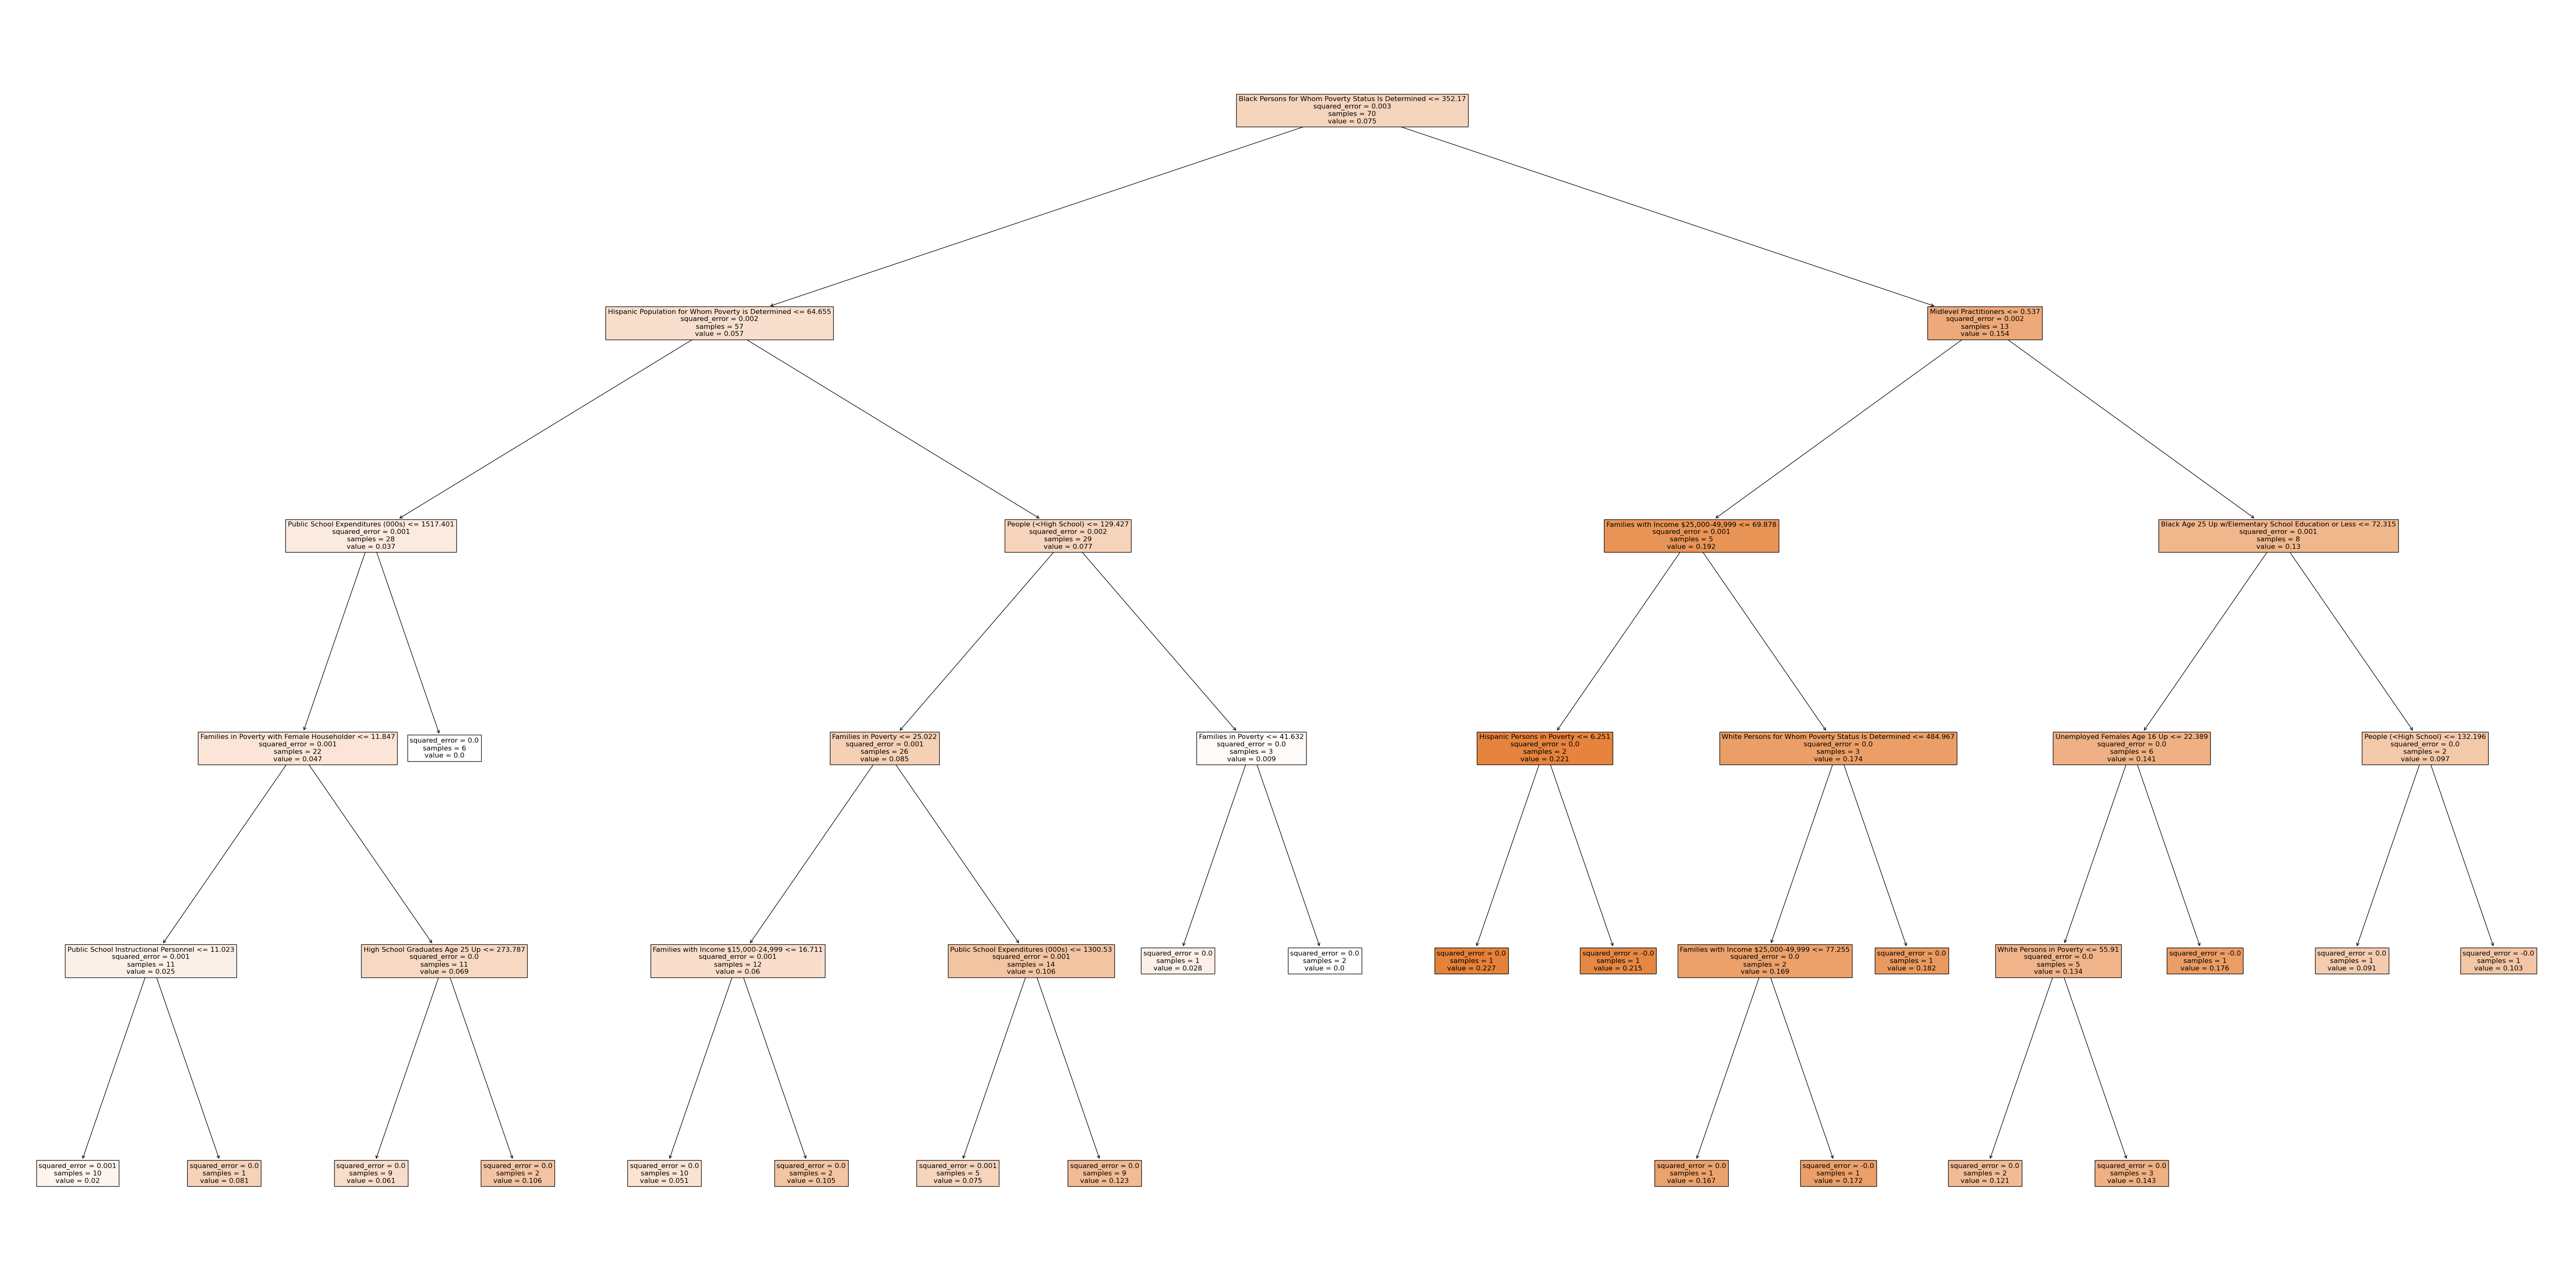

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

columns_that_correlate = ['Persons in Poverty',
                          'People (Below Poverty)',
                          'Families in Poverty',
                          'Families in Poverty with Female Householder',
                          'White Persons in Poverty', 
                          'Black Persons in Poverty',
                          'Hispanic Persons in Poverty', 
                          'White Persons for Whom Poverty Status Is Determined',
                          'Black Persons for Whom Poverty Status Is Determined',
                          'Hispanic Population for Whom Poverty is Determined',
                          'Families with Income $10,000-14,999',
                          'Families with Income $15,000-24,999',
                          'Families with Income $25,000-49,999',
                          'Families with Income $50,000 or More',
                          'Females Age 16 Up in Labor Force',
                          'Males Age 16 Up in Labor Force',
                          'Nonmanuf. Employment for Residents Age 16 Up',
                          'Unemployed Females Age 16 Up',
                          'Unemployed Males Age 16 Up',
                          'Public School Expenditures (000s)',
                          'Public School Expenditures - Federal (000s)',
                          'Public School Expenditures - Local (000s)',
                          'Public School Expenditures - State (000s)',
                          'People (<High School)',
                          'College Graduates Age 25 Up',
                          'High School Graduates Age 25 Up',
                          'White Age 25 Up w/Elementary School Education or Less',
                          'Black Age 25 Up w/Elementary School Education or Less',
                          'Public School Instructional Personnel',
                          'Midlevel Practitioners'

                          ]

per_thousand_columns =  columns_that_correlate + \
                        ['Infant Deaths']
                        


Correlated_df = Master_NC_Dataframe[['County', 'Population (Census/Estimate/Projection)', 'Infant Deaths'] + columns_that_correlate] 

for column in per_thousand_columns:
    Correlated_df[column] = Correlated_df[column] / Correlated_df["Population (Census/Estimate/Projection)"] * 1000

# Assuming `Correlated_df` is your DataFrame and you're interested in predicting 'Infant Deaths'
X = Correlated_df[columns_that_correlate]
y = Correlated_df['Infant Deaths']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'feature': columns_that_correlate, 'importance': importances})

# Display importances
importance_df = importance_df.sort_values('importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
print(importance_df)


feature_names = X.columns.tolist()
fig, ax = plt.subplots(figsize=(80, 40))  # Change the size as necessary
tree.plot_tree(model, fontsize=12, feature_names=feature_names, filled=True)  # Increase fontsize as necessary
plt.show()